# Part II - Airline on-time performance - Exploration
## by Juanita Smith

## Introduction
Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is our chance to find out.

This analysis will be focused on predicting flight delays or cancellations.

> This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008.
> - See more information from the data expo challenge in 2009 [here](https://community.amstat.org/jointscsg-section/dataexpo/dataexpo2009).
> - See a full description of the features [here](https://www.transtats.bts.gov/DatabaseInfo.asp?QO_VQ=EFD&Yv0x=D.)
> - Data can be downloaded from [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7).

Dictionary:
1) Year 1987-2008 
2) Month 1-12 
3) DayofMonth 1-31 
4) DayOfWeek 1 (Monday) - 7 (Sunday) 
5) DepTime actual departure time (local, hhmm) 
6) CRSDepTime scheduled departure time (local, hhmm) 
7) ArrTime actual arrival time (local, hhmm) 
8) CRSArrTime scheduled arrival time (local, hhmm) 
9) UniqueCarrier unique carrier code 
10) FlightNum flight number 
11) TailNum plane tail number 
12) ActualElapsedTime in minutes 
13) CRSElapsedTime in minutes 
14) AirTime in minutes 
15) ArrDelay arrival delay, in minutes 
16) DepDelay departure delay, in minutes 
17) Origin origin IATA airport code 
18) Destination IATA airport code 
19) Distance in miles 
20) TaxiIn - The time elapsed between wheels down and arrival at the destination airport gate in minutes
21) TaxiOut - The time elapsed between departure from the origin airport gate and wheels off in minutes
22) Cancelled was the flight cancelled? 
23) CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security) 
24) Diverted 1 = yes, 0 = no 
25) CarrierDelay in minutes
26) WeatherDelay in minutes 
27) NASDelay in minutes 
28) SecurityDelay in minutes 
29) LateAircraftDelay in minutes


**Important to note:** According to the documentation, a late flight is defined as a flight arriving or departing 15 minutes or more after the scheduled time.

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  





Important points:

- When a flight is cancelled, there are lots of missing values in departure and arrival related fields, as the flight never took off
- When a flight is diverted, columns related to departed are captured, whilst colums related to arrival are missing.
- A flight is considered delayed if arrival delay (arrDelay) >= 15 minutes
- Reasons for delay will only be captured if arrival delay > 15 minutes

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns
import time
import glob

# clear the garbage to free memory as we are working with huge datasets
import gc 

# import warnings
# warnings.filterwarnings("ignore")

# Import custom modules
from src.utils import reduce_mem_usage, create_folder, change_width

# set plots to be embedded inline
%matplotlib inline

# suppress matplotlib user warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# use high resolution if this project is run on an apple device
# %config InlineBackend.figure_format='retina'

# Make your Jupyter Notebook wider
from IPython.display import display, HTML
display(HTML('<style>.container { width:80% !important; }</style>'))

# environment settings
# display all columns and rows during visual inspection
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# stop scientific notation on graphs
#pd.options.display.float_format = '{:.02}'.format


from pylab import rcParams
from statsmodels.graphics import tsaplots
import statsmodels.api as sm

In [178]:
def set_plot_defaults():
    
    # set plot style
    sns.set_style("whitegrid")
    
    # teal blue
    BASE_COLOR = '#196689'

    #red
    BASE_HIGHLIGHT_INTENSE = sns.color_palette("vlag_r", 9)[0]
    BASE_HIGHLIGHT = sns.color_palette("vlag_r", 9)[2]

    #yellow
    BASE_COMPLEMENTRY = sns.color_palette("husl", 15)[3]

    #grey - used for comparison to all flights
    BASE_GREY = 'lightgrey'

    BASE_COLOR_ARR = sns.color_palette("vlag_r", 9)[8]
    BASE_COLOR_DEP = sns.color_palette("vlag_r", 9)[6]   
    
    # up and down arrows for growth indicators
    SYMBOLS = [u'\u25BC', u'\u25B2'] 
    
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 12

    # fig = plt.figure()
    # fig.rcParams('suptitle', fontsize=20)

    plt.rc('font', size=SMALL_SIZE, weight='ultralight', family='sans-serif')          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE, titlecolor='black', titleweight='bold', labelsize=MEDIUM_SIZE, labelcolor='black', labelweight='ultralight')     # axes title
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE, titleweight="bold", figsize=[8,4])  # fontsize of the figure title    
    
#     rcParams.update({
#         "font.weight": "ultralight",  # bold fonts
#         "tick.labelsize": 8,   # large tick labels
#         "lines.linewidth": 1,   # thick lines
# #         "lines.color": "k",     # black lines
# #         "grid.color": "0.5",    # gray gridlines
# #         "grid.linestyle": "-",  # solid gridlines
# #         "grid.linewidth": 0.5,  # thin gridlines
#         "savefig.dpi": 300,     # higher resolution output.
#     })

In [162]:
set_plot_defaults()

In [19]:
# rcParams.keys()

In [111]:
sns.set_style("whitegrid")
# BASE_COLOR = sns.color_palette("BrBG")[-2]
BASE_COLOR = '#196689'

#red
BASE_HIGHLIGHT = '#e67f83'

#yellow
BASE_COMPLEMENTRY = sns.color_palette("husl", 15)[3]

BASE_COLOR_ARR = '#2A5876'
BASE_COLOR_DEP = '#6c92ab'

# 


# lovely yellow color
# BASE_COLOR_DEP = sns.color_palette("husl", 15)[3]

# 0 = down arrow, 1 = up arrow for growth and shrink indicators
SYMBOLS = [u'\u25BC', u'\u25B2'] 

# default plot size
# plt.rcParams['figure.figsize'] = 12,4

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

# fig = plt.figure()
# fig.rcParams('suptitle', fontsize=20)

plt.rc('font', size=SMALL_SIZE, weight='ultralight', family='sans-serif')          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE, titlecolor='black', titleweight='bold', labelsize=MEDIUM_SIZE, labelcolor='black', labelweight='ultralight')     # axes title
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE, titleweight="bold", figsize=[8,4])  # fontsize of the figure title
# plt.rc('axes', labelsize=16, titlesize=16
# plt.rcParams['font.family'] = 'Serif'
# plt.rc('text')
# plt.rcParams['xtick.labelsize']=8

# mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.linestyle'] = '--'

# plt.rcParams.update({
#     "font.weight": "bold",
#     "xtick.major.size": 5,
#     "xtick.major.pad": 7,
#     "xtick.labelsize": 15,
#     "grid.color": "0.5",
#     "grid.linestyle": "-",
#     "grid.linewidth": 5,
#     "lines.linewidth": 2,
#     "lines.color": "g",
# })

In [21]:
# SMALL_SIZE = 8
# MEDIUM_SIZE = 10
# BIGGER_SIZE = 14

# plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# matplotlib.rcParams.update({'font.size': 22})
# matplotlib.rc('font', **font)

# plt.title("Simple plot", fontdict={'fontweight': 'normal', 'weight': 'normal', 'family': 'sans-serif'})

In [22]:
FILE_NAME_RAW = '../data/flights_raw.pkl'
FILE_NAME_CLEAN = '../data/flights_clean.pkl'

In [23]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [24]:
sns.color_palette("husl", 15)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9542900080364486, 0.4779505175890752, 0.1963917622115608),
 (0.7930046244373694, 0.5708100522446624, 0.19489531984381053),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.5571803870240879, 0.6507747739933957, 0.19331667588333168),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.20774052347943134, 0.6813852191365138, 0.6002900398972028),
 (0.21316806282417172, 0.6731234926210208, 0.6838056741516414),
 (0.21979956608283252, 0.6625157876850336, 0.7732093159317208),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.5830408541921136, 0.5695319215803094, 0.9583591966369759),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.9596479078308885, 0.3748291312853888, 0.8930044537663009),
 (0.9642903119819891, 0.41420146582831974, 0.7188681186026104)]

In [25]:
test = sns.color_palette("Paired")
test

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [26]:
sns.color_palette("BrBG")

[(0.6313725490196078, 0.3951557093425605, 0.09573241061130335),
 (0.8572856593617839, 0.7257977700884274, 0.4471357170319107),
 (0.9636293733179546, 0.9237985390234525, 0.8185313341022683),
 (0.8299115724721262, 0.9294886582083814, 0.9152633602460593),
 (0.4615916955017304, 0.7748558246828146, 0.7299500192233758),
 (0.0878892733564014, 0.479123414071511, 0.44775086505190315)]

In [27]:
sns.color_palette("muted")

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [28]:
sns.color_palette("vlag_r", 9)

[(0.73278943, 0.36956954, 0.36476549),
 (0.79842217, 0.5216578, 0.51146173),
 (0.85899928, 0.66937226, 0.6596292),
 (0.92704736, 0.82865028, 0.82181656),
 (0.97978484, 0.96222949, 0.95935496),
 (0.84921192, 0.86135782, 0.89626076),
 (0.68441395, 0.73612771, 0.82136094),
 (0.52753571, 0.62574126, 0.77013939),
 (0.35551826, 0.51744353, 0.73994642)]

In [29]:
# blue
# #93c6e6

# matching complimentary
# #e6b093

In [177]:
# BASE_COLOR = sns.color_palette("vlag_r", 9)[8]

# #red
BASE_HIGHLIGHT_INTENSE = sns.color_palette("vlag_r", 9)[0]
BASE_HIGHLIGHT = sns.color_palette("vlag_r", 9)[2]

#yellow
BASE_COMPLEMENTRY = sns.color_palette("husl", 15)[3]

#grey - used for comparison to all flights
BASE_GREY = 'lightgrey'

BASE_COLOR_ARR = sns.color_palette("vlag_r", 9)[8]
BASE_COLOR_DEP = sns.color_palette("vlag_r", 9)[6]

### Dataset Overview

In [181]:
# load the cleaned file 
flights = pd.read_pickle(FILE_NAME_CLEAN)
flights.sample(5)

,year,month,dayofMonth,dayOfWeek,depTime,CRSDepTime,arrTime,CRSArrTime,uniqueCarrier,flightNum,tailNum,actualElapsedTime,CRSElapsedTime,airTime,arrDelay,depDelay,origin,dest,distance,taxiIn,taxiOut,cancelled,cancellationCode,diverted,carrierDelay,weatherDelay,NASDelay,securityDelay,lateAircraftDelay
34601628,2007,11,20,2,0 days 17:05:00,0 days 17:10:00,0 days 18:39:00,0 days 18:50:00,9E,4760,88889E,94.0,100.0,74.0,0.0,0.0,IND,RDU,489,6.0,14.0,False,NaN,False,0.0,0.0,0.0,0.0,0.0
28384136,2007,1,27,6,0 days 15:14:00,0 days 15:19:00,0 days 16:24:00,0 days 16:35:00,9E,2952,89749E,70.0,76.0,47.0,0.0,0.0,DTW,CVG,229,6.0,17.0,False,NaN,False,0.0,0.0,0.0,0.0,0.0
13414296,2004,12,7,2,0 days 10:46:00,0 days 10:42:00,0 days 11:49:00,0 days 11:50:00,MQ,3543,N616AE,63.0,68.0,41.0,0.0,4.0,DFW,XNA,281,4.0,18.0,False,NaN,False,0.0,0.0,0.0,0.0,0.0
25397895,2006,8,26,6,0 days 17:29:00,0 days 17:31:00,0 days 18:35:00,0 days 18:42:00,AA,1865,N207AA,186.0,191.0,169.0,0.0,0.0,DFW,BUR,1231,2.0,15.0,False,NaN,False,0.0,0.0,0.0,0.0,0.0
20234754,2005,12,4,7,0 days 22:38:00,0 days 22:15:00,0 days 06:03:00,0 days 05:55:00,US,85,N124UW,265.0,280.0,244.0,8.0,23.0,SFO,PIT,2254,4.0,17.0,False,NaN,False,0.0,0.0,0.0,0.0,0.0


In [182]:
# make sure datatypes were preserved from cleaning step
flights.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37701228 entries, 0 to 37742759
Data columns (total 29 columns):
 #   Column             Non-Null Count     Dtype          
---  ------             --------------     -----          
 0   year               37701228 non-null  int16          
 1   month              37701228 non-null  int8           
 2   dayofMonth         37701228 non-null  int8           
 3   dayOfWeek          37701228 non-null  int8           
 4   depTime            36991149 non-null  timedelta64[ns]
 5   CRSDepTime         37701228 non-null  timedelta64[ns]
 6   arrTime            36913965 non-null  timedelta64[ns]
 7   CRSArrTime         37701228 non-null  timedelta64[ns]
 8   uniqueCarrier      37701228 non-null  object         
 9   flightNum          37701228 non-null  int16          
 10  tailNum            37632291 non-null  object         
 11  actualElapsedTime  36913965 non-null  float16        
 12  CRSElapsedTime     37700823 non-null  float16        


In [183]:
flights.shape

(37701228, 29)

In [184]:
# get carrier descriptions
carriers = pd.read_csv('../data/lookup_tables/carriers.csv', index_col='Code')
carriers.head()

,Description
Code,
02Q,Titan Airways
04Q,Tradewind Aviation
05Q,"Comlux Aviation, AG"
06Q,Master Top Linhas Aereas Ltd.
07Q,Flair Airlines Ltd.


In [185]:
# get airplane data
planes = pd.read_csv('../data/lookup_tables/plane-data.csv', index_col='tailnum')
planes.sample(10)

,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
tailnum,,,,,,,,
N850AS,Corporation,BOMBARDIER INC,04/30/2004,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
N457WN,Corporation,BOEING,05/11/2004,737-7H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004
N3748Y,Corporation,BOEING,06/19/2001,737-832,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2001
N286AE,Corporation,SAAB-SCANIA,05/15/1998,SAAB 340B,Valid,Fixed Wing Multi-Engine,Turbo-Prop,None
N57852,Corporation,BOEING,12/27/2001,757-324,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2001
N935LR,Corporation,BOMBARDIER INC,09/30/2005,CL600-2D24,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2005
N76156,Corporation,BOEING,02/16/2001,767-224,Valid,Fixed Wing Multi-Engine,Turbo-Jet,2001
N179UA,Corporation,BOEING,02/23/2006,747-422,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1991
N331SW,Corporation,BOEING,01/18/2008,737-3H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1988


In [186]:
# check and drop rows that contain only missing values
planes = planes.loc[planes.isna().mean(axis=1) <= 0.4, :]

In [187]:
# get airport descriptions
airports = pd.read_csv('../data/lookup_tables/airports.csv', index_col='iata')
airports.sample(10)

,airport,city,state,country,lat,long
iata,,,,,,
CID,Eastern Iowa,Cedar Rapids,IA,USA,41.884588,-91.710872
3FU,Faulkton Municipal,Faulkton,SD,USA,45.031919,-99.115664
CMA,Camarillo,Camarillo,CA,USA,34.213755,-119.094326
LKV,Lake County,Lakeview,OR,USA,42.161111,-120.399070
P20,Avi Suquilla,Parker,AZ,USA,34.150639,-114.271222
D25,Manitowish Waters,Manitowish Waters,WI,USA,46.121972,-89.882333
F53,Franklin County,Mount Vernon,TX,USA,33.215306,-95.237493
3LC,Logan County,Lincoln,IL,USA,40.158472,-89.334972
ND06,Cavalier Municipal,Cavalier,ND,USA,48.783881,-97.629810


In [188]:
# check and drop rows that contain only missing values
airports = airports.loc[airports.isna().mean(axis=1) <= 0.4, :]

### Feature engineering

In [198]:
# create a datetime field for time series analysis
flights.rename(columns={'dayofMonth':'day'}, inplace=True)
flights['hour'] = flights['arrTime'].dt.components['hours']
flights['date'] = pd.to_datetime(flights[['year', 'month', 'day', 'hour']], yearfirst=True, errors='raise')
flights[['year', 'month', 'day', 'arrTime', 'date']][:5]

,year,month,day,arrTime,date
0,2003,1,29,0 days 19:12:00,2003-01-29 19:00:00
1,2003,1,30,0 days 19:10:00,2003-01-30 19:00:00
2,2003,1,31,0 days 19:36:00,2003-01-31 19:00:00
3,2003,1,1,0 days 16:25:00,2003-01-01 16:00:00
4,2003,1,2,0 days 17:26:00,2003-01-02 17:00:00


In [200]:
# build a flight .status field to compare cancelled, diverted, ontime and delayed flights
flights['flight_status'] = np.where(flights['cancelled'] == True, 'cancelled',
                           np.where(flights['diverted'] == True, 'diverted',
                           np.where((flights['cancelled'] == False) & (flights['diverted'] == False) & (flights['arrDelay'] >= 15), 'delayed',    
                           np.where((flights['cancelled'] == False) & (flights['diverted'] == False) & (flights['arrDelay'] < 15), 'on_time', np.nan))))  

flights['flight_status'].value_counts()

on_time      28987264
delayed       7926701
cancelled      710079
diverted        77184
Name: flight_status, dtype: int64

In [201]:
# add new 'lane' feature consisting of both departure and arrival airport
flights['lane'] = flights['origin'] + '-' + flights['dest']

In [202]:
# extract delayed and ontime flights into seperate datasets
flight_delays = flights.loc[flights['flight_status'] == 'delayed'].copy()
flight_ontime = flights.loc[flights['flight_status'] == 'on_time'].copy()

In [203]:
# get all columns of type float
float_columns = list(flight_delays.select_dtypes(include=['float16']).columns)

# convert all float columns to int16, which should now be possible as cancelled and diverted data had a lot of missing values in
flight_delays[float_columns] = flight_delays[float_columns].astype('int16')
flight_ontime[float_columns] = flight_ontime[float_columns].astype('int16')

In [204]:
flight_delays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7926701 entries, 2 to 37742740
Data columns (total 33 columns):
 #   Column             Dtype          
---  ------             -----          
 0   year               int16          
 1   month              int8           
 2   day                int8           
 3   dayOfWeek          int8           
 4   depTime            timedelta64[ns]
 5   CRSDepTime         timedelta64[ns]
 6   arrTime            timedelta64[ns]
 7   CRSArrTime         timedelta64[ns]
 8   uniqueCarrier      object         
 9   flightNum          int16          
 10  tailNum            object         
 11  actualElapsedTime  int16          
 12  CRSElapsedTime     int16          
 13  airTime            int16          
 14  arrDelay           int16          
 15  depDelay           int16          
 16  origin             object         
 17  dest               object         
 18  distance           int16          
 19  taxiIn             int16          
 20  t

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


#### Let's get a first impression of how many flights are ontime, delayed, cancelled or diverted

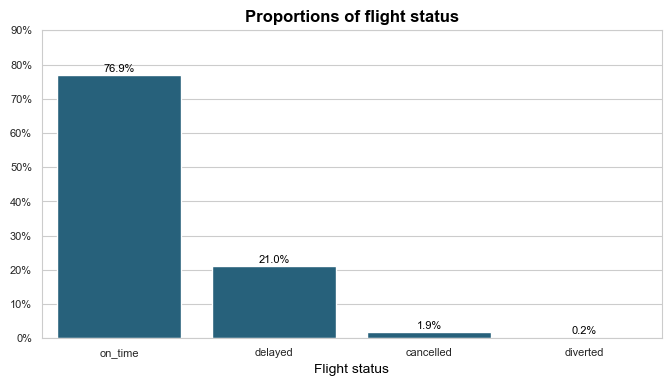

In [45]:
# calculate number of flights per flight status and plot it
flight_status_summary = flights['flight_status'].value_counts(normalize=True).sort_values(ascending=False)
sns.barplot(x=flight_status_summary.index, y=flight_status_summary, color=BASE_COLOR)
plt.ylabel('')
plt.xlabel('Flight status')
plt.title('Proportions of flight status')

locs, labels = plt.xticks()

# for each bar, print a % text at the top of each bar
for loc, label in zip(locs,labels):
    count = flight_status_summary[label.get_text()]
    pct_string = '{:0.1f}%'.format(count*100)
    plt.text(loc, count+0.01, pct_string, ha='center', color='black', size=8, weight='ultralight')
    
ticks = np.arange(0, 1, 0.1)
labels = ['{:1.0f}%'.format(tick*100) for tick in ticks]
plt.yticks(ticks,labels)

plt.show()

>Around 77% of flights are on time, where as 21% are delayed. Only 2% of flights are cancelled or diverted which is not therefore not the main concern

### Delay Exploration

In [ ]:
#### Start by looking at the distribution of the main variable of interest to predict delays: `arrDelay`.
Compare arrDelay distribution to depDelay distribution for flights that are delayed

In [46]:
# Take a closer look at distribution of delayed flights
flight_delays[['depDelay', 'arrDelay']].describe([0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99]).round(0)

,depDelay,arrDelay
count,7926701.0,7926701.0
mean,44.0,53.0
std,54.0,53.0
min,0.0,15.0
25%,11.0,22.0
50%,30.0,35.0
75%,59.0,64.0
85%,83.0,89.0
90%,104.0,111.0
95%,142.0,150.0


In [47]:
# Take a closer look at distribution of all flights
flights[['depDelay', 'arrDelay']].describe([0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99]).round(0)

,depDelay,arrDelay
count,36991149.0,36913965.0
mean,NaN,NaN
std,NaN,NaN
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,7.0,11.0
85%,20.0,24.0
90%,33.0,38.0
95%,62.0,67.0


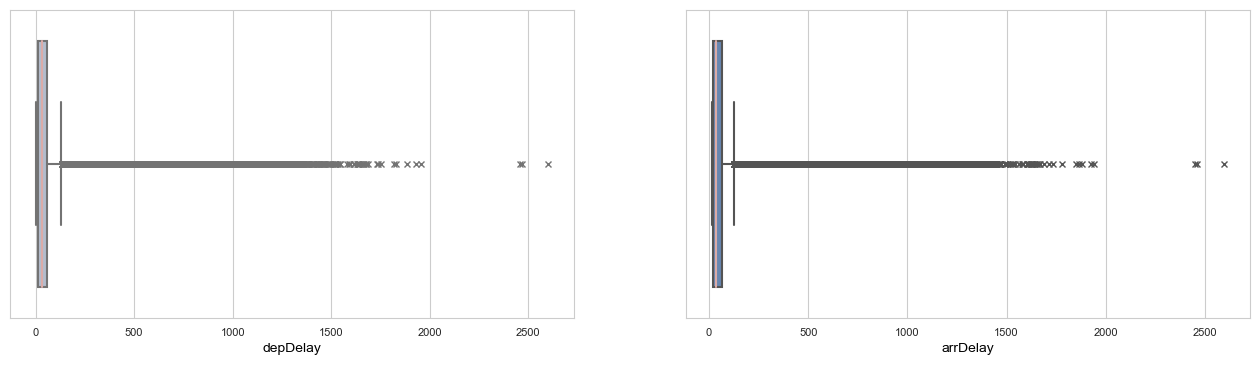

In [48]:
fig, ax = plt.subplots(ncols=2, figsize=(16,4))   

plt.subplot(1,2,1)
sns.boxplot(data=flight_delays, x='depDelay', color = BASE_COLOR_DEP, flierprops={"marker": "x"}, medianprops={"color": BASE_HIGHLIGHT })

plt.subplot(1,2,2)
sns.boxplot(data=flight_delays, x='arrDelay', color = BASE_COLOR_ARR, flierprops={"marker": "x"}, medianprops={"color": BASE_HIGHLIGHT })

plt.show()

At 99% percentile, we have delays of around 250 minutes, where the max is quite extreme at around 2600 minutes. Remove all datapoints where departure delay > 250 minutes

In [216]:
flight_delays = flight_delays.loc[(flight_delays['depDelay'] <= 250) & (flight_delays['arrDelay'] <= 250)]
flight_ontime = flight_ontime.loc[(flight_ontime['depDelay'] <= 250) & (flight_ontime['arrDelay'] <= 250)]
flights = flights.loc[(flights['depDelay'] <= 250) & (flights['arrDelay'] <= 250)]

In [ ]:
# plt.figure(figsize=[16,4])

xbins = np.arange(0, flight_delays['arrDelay'].max()+15, 15)

# plot 1 - distribution of departure delays
ax1 = plt.subplot(1, 2, 1)
ax1.hist(data=flight_delays, x='depDelay', bins=xbins, color=BASE_COLOR_DEP)

plt.xlabel('Departure delays (in minutes)')
plt.ylabel('Number of flights')
plt.xlim(0, 300)
plt.title('Distribution of departure delays')

# plot 2 - distribution of arrival delays
ax2 = plt.subplot(1, 2, 2, sharey=ax1, sharex=ax1)
ax2.hist(data=flight_delays, x='arrDelay', bins=xbins, color=BASE_COLOR_ARR)
plt.xlabel('Arrival delays (in minutes)')
plt.title('Distribution of arrival delays')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

In [ ]:
# As the distribution of delays are right skewed, lets plot a log distribution instead

# plt.figure(figsize=[12,4])
log_binsize = 0.1
bins= 10 ** np.arange(0, np.log10(flight_delays['arrDelay'].max())+log_binsize, log_binsize)
ticks = [1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(tick) for tick in ticks]

ax2 = plt.subplot(1, 2, 2)
plt.hist(data=flight_ontime, x='arrDelay', bins=bins, color=BASE_COLOR_ARR, alpha=0.2)
plt.hist(data=flight_delays, x='arrDelay', bins=bins, color=BASE_COLOR_ARR)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Arrival delays (in minutes)')
plt.ylabel('Number of flights')
plt.title('Log Distribution of arrival delays')
plt.ticklabel_format(style='plain', axis='y')
plt.xlim(1, 300)

ax1 = plt.subplot(1, 2, 1, sharex=ax2, sharey=ax2)
plt.hist(data=flight_delays, x='depDelay', bins=bins, color=BASE_COLOR_DEP)
plt.xticks(ticks, labels)
plt.xlabel('Departure delays (in minutes)')
plt.ylabel('Number of flights')
plt.title('Log Distribution of departure delays')
plt.ticklabel_format(style='plain', axis='y')
# plt.xlim(1, 300)

plt.tight_layout()

>Both departure and arrival delays are right skewed. When plotted on a log scale, arrival delays are still right skewed whilst departure delays are more normally distributed.
Arrival delays were restricted to >= 15 minutes, which was not the case for departure delays, otherwise departure delays would also be right skewed.

>Most arrivals are around 20 minutes late. There is a steep decline in delays > 20 minutes.

#### What are the main reasons for delays ?

In [52]:
# drop records where all delay reasons are 0, means reasons are not available
delay_reasons = flight_delays.loc[flight_delays[['carrierDelay','weatherDelay','NASDelay','securityDelay','lateAircraftDelay']].sum(axis=1) != 0]

In [53]:
# calculate the mean minutes and proportion of each reason
delay_reason_melt = pd.melt(delay_reasons, value_vars = ['carrierDelay','weatherDelay','NASDelay','securityDelay','lateAircraftDelay'], value_name='minutes')
delay_reason_melt = delay_reason_melt.groupby('variable')['minutes'].agg(['sum', 'mean'])
delay_reason_melt['perc'] = delay_reason_melt['sum']/delay_reason_melt['sum'].sum()*100
delay_reason_melt.sort_values(by='perc', ascending=False, inplace=True)
delay_reason_melt.head()

,sum,mean,perc
variable,,,
lateAircraftDelay,134129200,18.027486,36.006839
NASDelay,118113276,15.874883,31.707381
carrierDelay,98692379,13.264639,26.493862
weatherDelay,20749080,2.788757,5.570068
securityDelay,826412,0.111073,0.221849


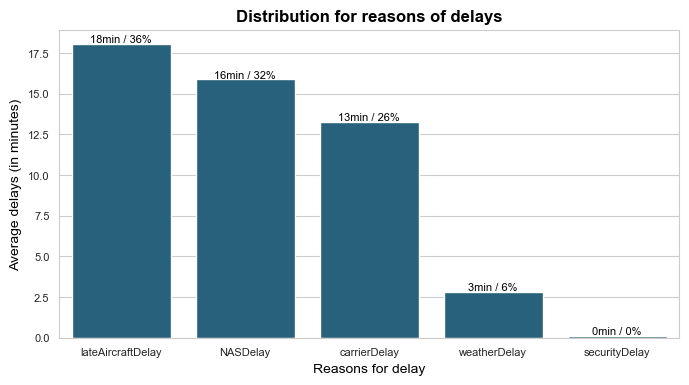

In [54]:
sns.barplot(data=delay_reason_melt, x=delay_reason_melt.index, y='mean', color=BASE_COLOR)

plt.title('Distribution for reasons of delays')
plt.xlabel('Reasons for delay')
plt.ylabel('Average delays (in minutes)')

# for each bar, print % of total delay at the top of each bar
locs, labels = plt.xticks()
for loc, label in zip(locs,labels):
    bar = delay_reason_melt.loc[label.get_text()]
    pct_string = '{:0.0f}min / {:0.0f}%'.format(bar['mean'], bar['perc'])
    plt.text(loc, bar['mean']+0.1, pct_string, ha='center', color='black', size=8, weight='ultralight')

plt.show()

>The top 3 reasons for delays are caused by late aircrafts, NAS, and carriers
>- 36% of delays are caused by late aircrafts with an average of 19 minutes delay
>- 31% of delays are caused by NAS with an average of 16 minutes delay
>- 28% of delays are caused by carriers with an avrage of 15 minutes delay
>- Weather and security cause only 6% of all delays

#### How are top 3 reasons for delay distributed ?

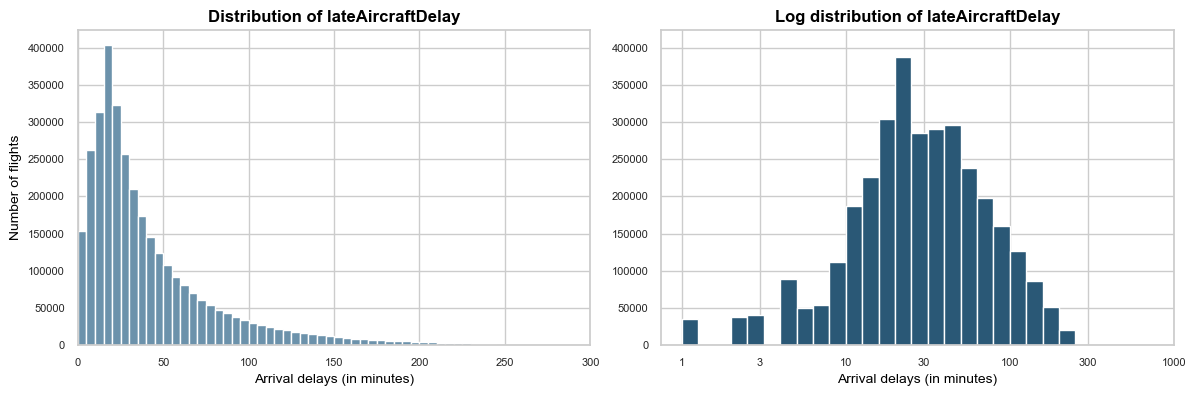

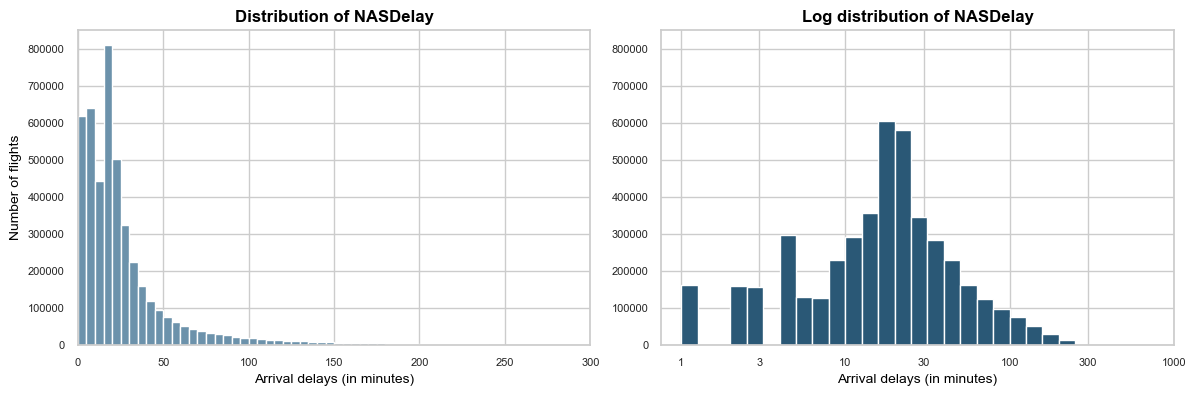

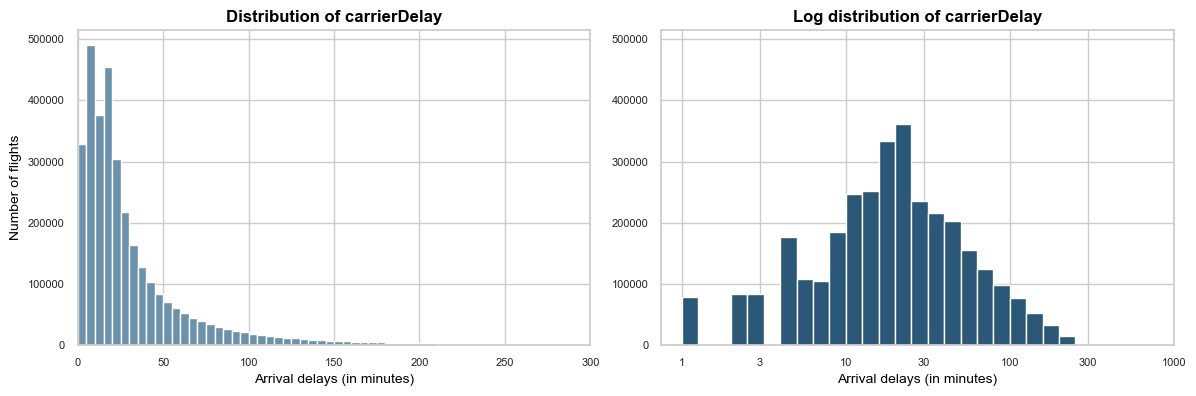

In [112]:
for col in ['lateAircraftDelay', 'NASDelay', 'carrierDelay']:
     
    plt.figure(figsize=[12,4])  
    
    # plot 2 - log distribution for reason of delay
    ax2 = plt.subplot(1, 2, 2)    
       
    log_binsize = 0.1
    bins= 10 ** np.arange(0, np.log10(delay_reasons[col].max())+log_binsize, log_binsize)
    ticks = [1, 3, 10, 30, 100, 300, 1000]
    labels = ['{}'.format(tick) for tick in ticks]

    plt.hist(data=delay_reasons, x=col, bins=bins, color=BASE_COLOR_ARR)
    plt.xscale('log')
    plt.xticks(ticks,labels)
    
    plt.xlabel('Arrival delays (in minutes)')
    plt.title('Log distribution of {}'.format(col))    
    
    # plot 1 - distribution of reason for delay
    xbins = np.arange(0, delay_reasons[col].max()+5, 5)

    ax1 = plt.subplot(1, 2, 1, sharey=ax2)
    plt.hist(data=delay_reasons.loc[delay_reasons[col] > 0], x=col, bins=xbins, color=BASE_COLOR_DEP)
      
    plt.xlabel('Arrival delays (in minutes)')
    plt.ylabel('Number of flights')
    plt.xlim(0, 300)
    plt.title('Distribution of {}'.format(col))
    
    plt.tight_layout()

>Late aircrafts, NAS and carrier delays are all right skewed, with a normal distribution on log scale. The mean delay on log scale are around 20-25 min

In [ ]:
#### When is the best time of day/day of week/time of year to fly to minimise delays?

Build a time series to view flight and delay patterns at different period intervals to discover possible trends and peaks

In [56]:
# build a timeseries dataset with delays per day, with datatime field as index
flight_timeseries_day = flights.groupby('date')['flight_status'].value_counts().unstack()
flight_timeseries_day['total_flights'] = flight_timeseries_day.sum(axis=1)
flight_timeseries_day['diff_delay'] = flight_timeseries_day['delayed'].diff()
flight_timeseries_day['pct_delay'] = flight_timeseries_day['delayed'].pct_change()
flight_timeseries_day.head()

flight_status,delayed,on_time,total_flights,diff_delay,pct_delay
date,,,,,
2003-01-01,1948,14027,15975,NaN,NaN
2003-01-02,4160,14058,18218,2212.0,1.135524
2003-01-03,4514,13925,18439,354.0,0.085096
2003-01-04,2651,13223,15874,-1863.0,-0.412716
2003-01-05,4732,12583,17315,2081.0,0.784987


In [57]:
flight_timeseries_day.tail()

flight_status,delayed,on_time,total_flights,diff_delay,pct_delay
date,,,,,
2008-04-26,2886,13800,16686,-1814.0,-0.385957
2008-04-27,3263,16088,19351,377.0,0.130631
2008-04-28,5456,14484,19940,2193.0,0.672081
2008-04-29,2691,17246,19937,-2765.0,-0.506782
2008-04-30,2440,17850,20290,-251.0,-0.093274


>2008 does not contain data for the full year, only Jan - April is available. Drop this year from the data

In [58]:
flight_timeseries_day = flight_timeseries_day.loc[flight_timeseries_day.index.year < 2008]

#### Let's start by looking of the distribution of flights vs delays per year

In [59]:
freq = 'Y'
flight_timeseries_year = flight_timeseries_day.resample(freq).sum()
flight_timeseries_year['total_flights'] = flight_timeseries_year.sum(axis=1)
flight_timeseries_year['pct_delay'] = flight_timeseries_year['delayed'].pct_change()
flight_timeseries_year['pct_all'] = flight_timeseries_year['total_flights'].pct_change()
flight_timeseries_year

flight_status,delayed,on_time,total_flights,diff_delay,pct_delay,pct_all
date,,,,,,
2003-12-31,1045856,5314497,1.272042e+07,-322.0,NaN,NaN
2004-12-31,1402568,5559243,1.392496e+07,1300.0,0.341072,0.094693
2005-12-31,1444761,5523152,1.393659e+07,732.0,0.030083,0.000836
2006-12-31,1592800,5386014,1.395944e+07,1782.0,0.102466,0.001640
2007-12-31,1777735,5470416,1.449586e+07,-464.0,0.116107,0.038427


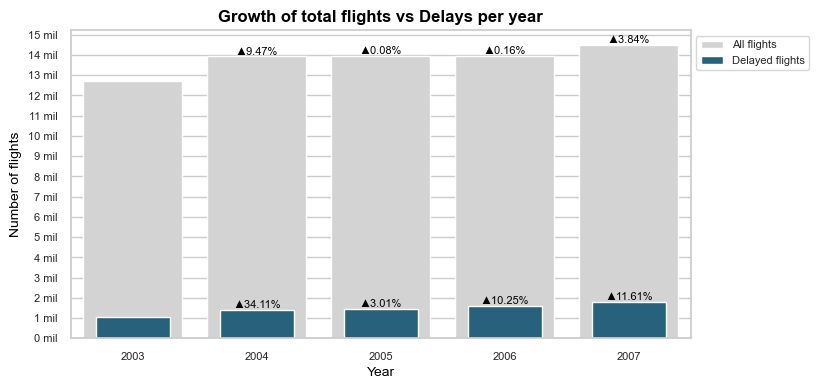

In [113]:
plt.figure(figsize=[8,4])

sns.barplot(data=flight_timeseries_year, x=flight_timeseries_year.index.year, y='total_flights', color=BASE_GREY, label='All flights')
sns.barplot(data=flight_timeseries_year, x=flight_timeseries_year.index.year, y='delayed', color=BASE_COLOR, label='Delayed flights', width=0.6)

# for each blue bar, print % delays over total flights year on year 
locs, labels = plt.xticks()
for loc, label in zip(locs,labels):
    date = pd.to_datetime(label.get_text()).strftime('%Y')
    date = date + '-12-31'
    counts = flight_timeseries_year.loc[date]
    
    # add positive or negative sign
    symbol = ''
    if pd.isna(counts['pct_delay']):
        continue
    elif counts['pct_delay'] > 0:
        symbol = SYMBOLS[1]
    elif counts['pct_delay'] < 0:
        symbol = SYMBOLS[0]
    
    pct_string_delay = '{}{:0.2f}%'.format(symbol, round(counts['pct_delay']*100,2))
    pct_string_all = '{}{:0.2f}%'.format(symbol, round(counts['pct_all']*100,2))
    plt.text(loc, counts.delayed+100000, pct_string_delay, ha='center', color='black', fontsize=8)
    plt.text(loc, counts.total_flights+100000, pct_string_all, ha='center', color='black', fontsize=8)
    
binsize=1000000
yticks = np.arange(0, flight_timeseries_year['total_flights'].max()+binsize, binsize)
ylabels = ['{:1.0f}'.format(tick/1000000)+' mil' for tick in yticks]
plt.yticks(yticks, ylabels)    

plt.legend(bbox_to_anchor=(1, 1), loc='upper left') 
plt.title('Growth of total flights vs Delays per year')
plt.xlabel('Year')
plt.ylabel('Number of flights')

plt.show()

>Both the total number of flights and delays increase every year. The growth rate of delays are higher than flight growth.

#### Can we spot peaks in months ? For example are summer months and xmas causing delays at airports ?

In [115]:
freq = 'M'
flight_timeseries_month = flight_timeseries_day.resample(freq).sum()
flight_timeseries_month['total_flights'] = flight_timeseries_month.sum(axis=1)
flight_timeseries_month['pct_delay'] = flight_timeseries_month['delayed'].pct_change()
flight_timeseries_month['pct_all'] = flight_timeseries_month['total_flights'].pct_change()
flight_timeseries_month['diff_delay'] = flight_timeseries_month['delayed'].diff()
flight_timeseries_month['pct_diff_delay'] = flight_timeseries_month['diff_delay'].pct_change()
flight_timeseries_month.head()

flight_status,delayed,on_time,total_flights,diff_delay,pct_delay,pct_all,pct_diff_delay
date,,,,,,,
2003-01-31,82177,459920,1.085636e+06,NaN,NaN,NaN,NaN
2003-02-28,95302,382800,9.560177e+05,13125.0,0.159716,-0.119393,NaN
2003-03-31,86201,461688,1.094157e+06,-9101.0,-0.095496,0.144495,-1.693410
2003-04-30,61620,457555,1.039684e+06,-24581.0,-0.285159,-0.049786,1.700912
2003-05-31,74573,452983,1.053869e+06,12953.0,0.210208,0.013644,-1.526952


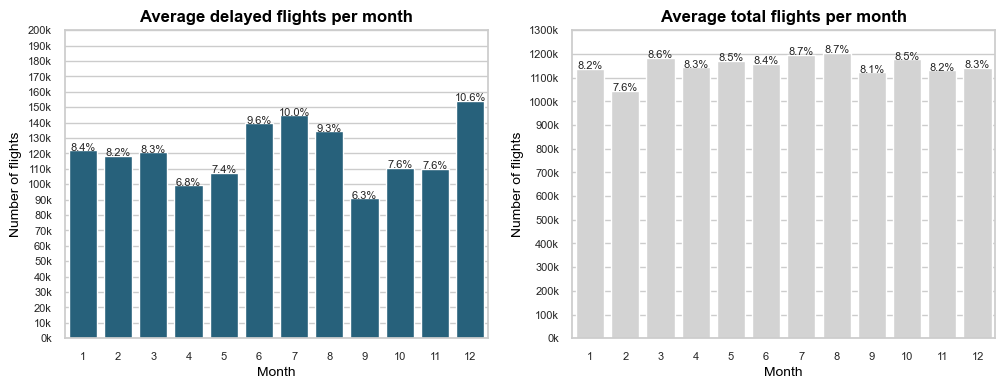

In [116]:
flight_total = flight_timeseries_month.groupby(flight_timeseries_month.index.month)['total_flights'].mean().sum()
delay_total = flight_timeseries_month.groupby(flight_timeseries_month.index.month)['delayed'].mean().sum()

plt.figure(figsize=[12,4])

plt.subplot(1,2,2)
ax1 = sns.barplot(data=flight_timeseries_month, x=flight_timeseries_month.index.month, y='total_flights', color=BASE_GREY, label='All flights', errorbar=None, errwidth=1)
    
binsize=100000
yticks = np.arange(0, flight_timeseries_month['total_flights'].max()+binsize, binsize)
ylabels = ['{:1.0f}'.format(tick/1000)+'k' for tick in yticks]
plt.yticks(yticks, ylabels)  

# Adding the percentage values 
for p in ax1.patches:
    ax1.annotate("{:.1%}".format(p.get_height()/flight_total), 
                   (p.get_x() + p.get_width() / 2., 
                    p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 2), 
                    textcoords = 'offset points',
                    size=8, 
                    weight='ultralight')   


plt.title('Average total flights per month')
plt.xlabel('Month')
plt.ylabel('Number of flights')

plt.subplot(1,2,1)
ax2 = sns.barplot(data=flight_timeseries_month, x=flight_timeseries_month.index.month, y='delayed', color=BASE_COLOR, label='Delayed flights', errorbar=None, errwidth=1)

binsize=10000
yticks = np.arange(0, flight_timeseries_month['delayed'].max()+binsize, binsize)
ylabels = ['{:1.0f}'.format(tick/1000)+'k' for tick in yticks]
plt.yticks(yticks, ylabels)  

# Adding the percentage values 
for p in ax2.patches:
    ax2.annotate("{:.1%}".format(p.get_height()/delay_total), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 2), 
                   textcoords = 'offset points',
                   size=8, 
                   weight='ultralight')

plt.title('Average delayed flights per month')
plt.xlabel('Month')
plt.ylabel('Number of flights')

plt.show()

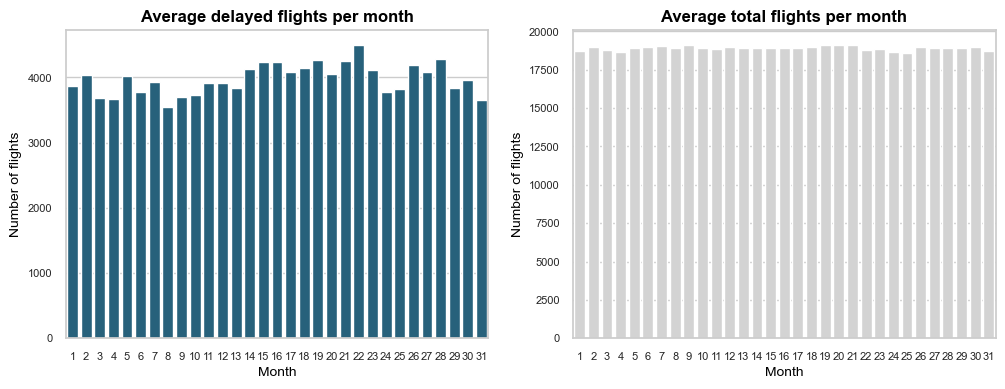

In [119]:
flight_total = flight_timeseries_day.groupby(flight_timeseries_day.index.day)['total_flights'].mean().sum()
delay_total = flight_timeseries_day.groupby(flight_timeseries_day.index.day)['delayed'].mean().sum()

plt.figure(figsize=[12,4])

plt.subplot(1,2,2)
ax1 = sns.barplot(data=flight_timeseries_day, x=flight_timeseries_day.index.day, y='total_flights', color=BASE_GREY, label='All flights', errorbar=None, errwidth=1)
    
binsize=100000
yticks = np.arange(0, flight_timeseries_day['total_flights'].max()+binsize, binsize)
ylabels = ['{:1.0f}'.format(tick/1000)+'k' for tick in yticks]
# plt.yticks(yticks, ylabels)  

# # Adding the percentage values 
# for p in ax1.patches:
#     ax1.annotate("{:.1%}".format(p.get_height()/flight_total), 
#                    (p.get_x() + p.get_width() / 2., 
#                     p.get_height()), 
#                     ha = 'center', va = 'center', 
#                     xytext = (0, 2), 
#                     textcoords = 'offset points',
#                     size=8, 
#                     weight='ultralight')   


plt.title('Average total flights per month')
plt.xlabel('Month')
plt.ylabel('Number of flights')

plt.subplot(1,2,1)
ax2 = sns.barplot(data=flight_timeseries_day, x=flight_timeseries_day.index.day, y='delayed', color=BASE_COLOR, label='Delayed flights', errorbar=None, errwidth=1)

binsize=10000
yticks = np.arange(0, flight_timeseries_day['delayed'].max()+binsize, binsize)
ylabels = ['{:1.0f}'.format(tick/1000)+'k' for tick in yticks]
# plt.yticks(yticks, ylabels)  

# # Adding the percentage values 
# for p in ax2.patches:
#     ax2.annotate("{:.1%}".format(p.get_height()/delay_total), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 2), 
#                    textcoords = 'offset points',
#                    size=8, 
#                    weight='ultralight')

plt.title('Average delayed flights per month')
plt.xlabel('Month')
plt.ylabel('Number of flights')

plt.show()

>The biggest peaks in delays are in summer months 6-8 and xmas period months 12. Delays decrease in spring/autumn months.
There is not as much variation in the average **total** flights per month, the summer and christmas peaks are not so evidant

#### Can we spot peaks in certain days of the week ? 

In [144]:
def period_plot(df, col, annotate=True, theme='period'):
    sns.barplot(data=df, x=col, y='total_flights', color=BASE_GREY, label='All flights', errorbar=None, errwidth=1)
    g = sns.barplot(data=df, x=col, y='delayed', color=BASE_COLOR, label='Delayed flights', errorbar=None, errwidth=1, width=0.6)

    if annotate:
        for p in g.patches:
            g.annotate(format(p.get_height(), '.0f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 2), 
                           textcoords = 'offset points',
                           fontsize=6, 
                           weight='ultralight')

    plt.legend(bbox_to_anchor=(1, 1), loc='upper left') 
    plt.title('Average total flights vs delays per {}'.format(theme))
    plt.xlabel(theme)
    plt.ylabel('Number of flights')

    plt.show()

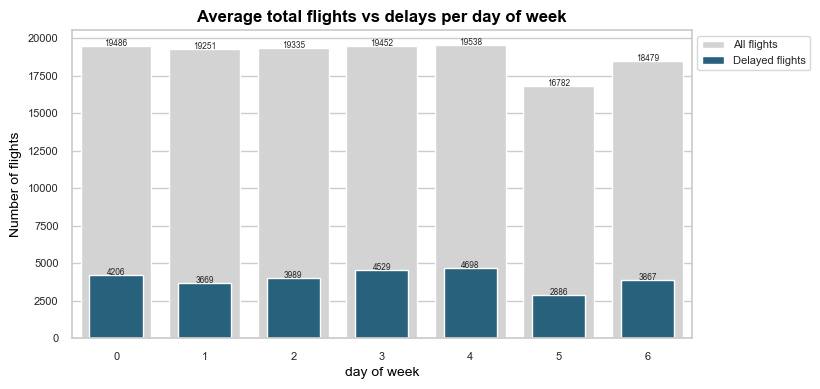

In [145]:
period_plot(flight_timeseries_day, flight_timeseries_day.index.dayofweek, annotate=True, theme='day of week')

>Most delays happens on Monday, Wednesday and Thursday when there are more flights than on other days. Airports are less busy with less delays on weekends. 

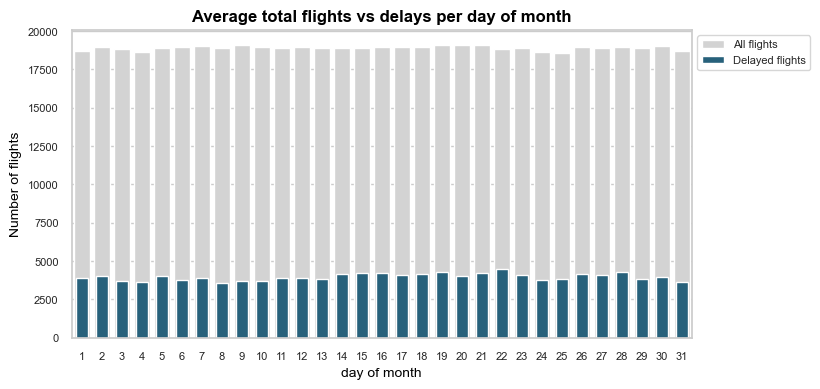

In [147]:
period_plot(flight_timeseries_day, flight_timeseries_day.index.day, annotate=False, theme='day of month')

#### Can we confirm the seasonal patterns for summer and xmas periods in time series plotting?

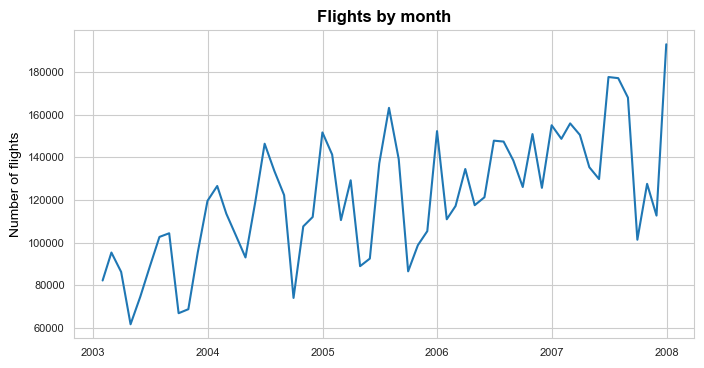

In [64]:
plt.errorbar(x=flight_timeseries_month.index, y=flight_timeseries_month['delayed'])
plt.title('Flights by month')
plt.ylabel('Number of flights')
plt.show()

We can visually observe an upwards trend in delayed flights per year, delayed flights are increasing

#### Compare average percentage change per month for all flights vs delays

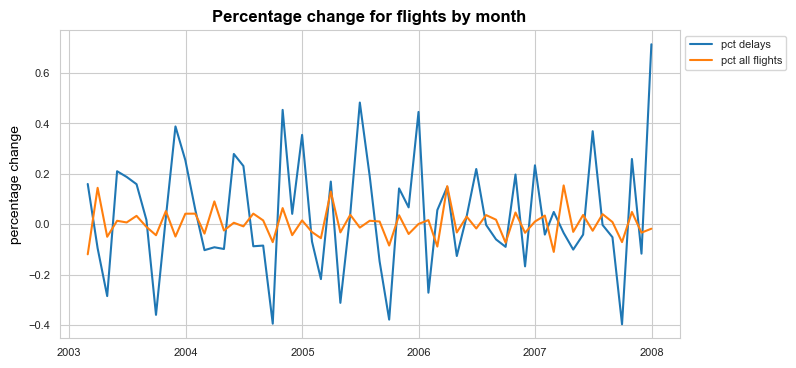

In [65]:
plt.errorbar(x=flight_timeseries_month.index, y=flight_timeseries_month['pct_delay'], label='pct delays')
plt.errorbar(x=flight_timeseries_month.index, y=flight_timeseries_month['pct_all'], label='pct all flights')
plt.title('Percentage change for flights by month')
plt.ylabel('percentage change')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left') 
plt.show()

# TODO: try scaling techniques to nomarize these numbers for comparison

>Percentage difference per month for delays have a much larger range than percentage difference for all flights. This indicates that throughout the year, roughly the same number of flights fly between locations, whereas we experience more delays in airports during peak times. This suggest, that flights in peak times might be fully booked, attracting more passengers to the airports, and airports cannot cope with the volume of people, even if the number of planes stay the same.

#### Use statsmodels auto and partial correlation to pickup seasonal patterns

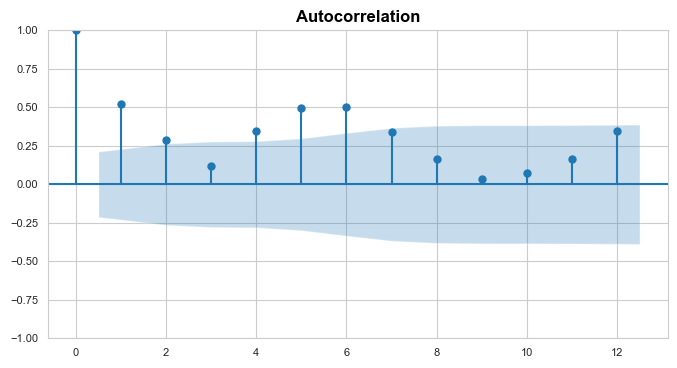

In [66]:
# plotting autocorrelations
fig = tsaplots.plot_acf(flight_timeseries_month['delayed'], lags=12, alpha=0.1)
plt.show()

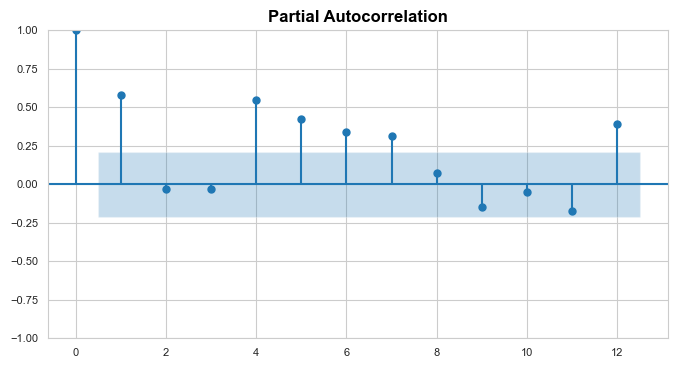

In [67]:
# plotting partial autocorrelations
fig = tsaplots.plot_pacf(flight_timeseries_month['delayed'], lags=12, alpha=0.1, method = "ols")
plt.show()

Looking at autocorrelations and partial correlations, we pickup a correlation at lag 1, which suggest there might be a pattern with a month ?
There is also a strong correlation at lag 4 which suggest a seasonal pattern for the summer peak, and another strong correlation at lag 12 xmas period

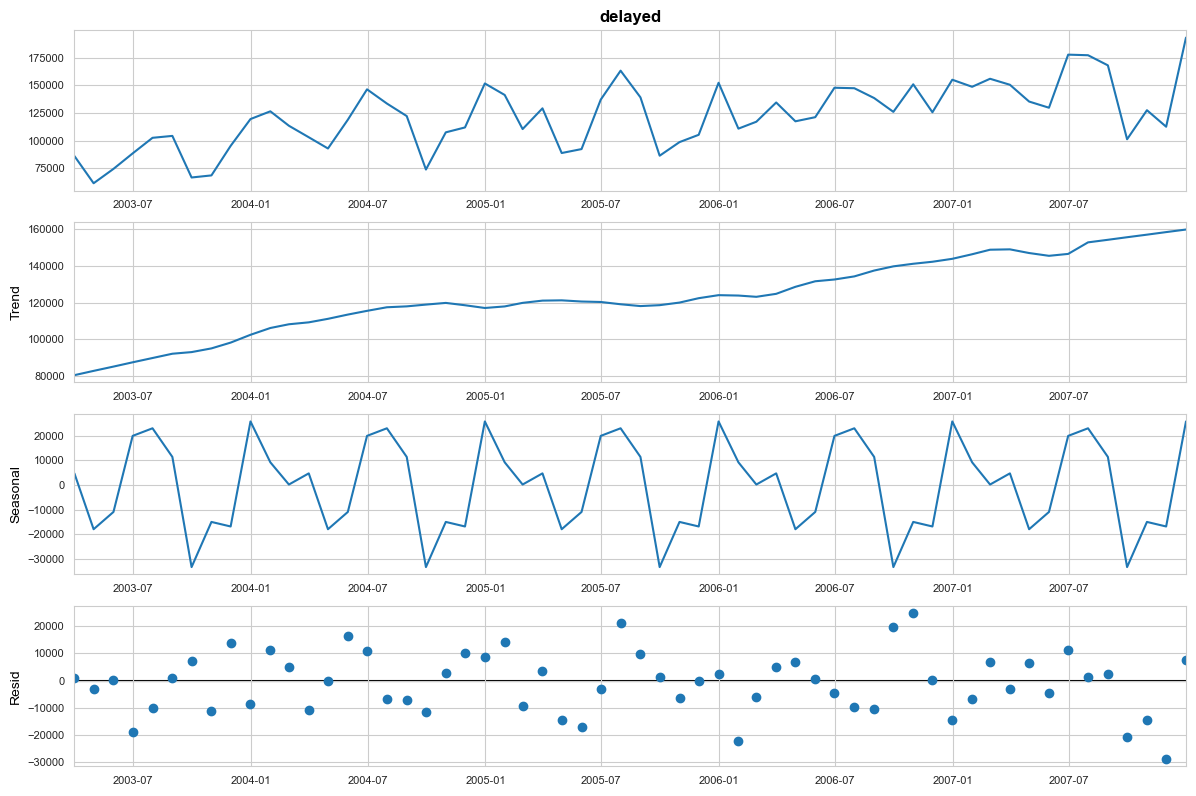

In [68]:
# print seasonal patterns using stats models
plt.rc("figure", figsize=(12,8))
flight_timeseries_month.dropna(inplace=True)
decomposition = sm.tsa.seasonal_decompose(flight_timeseries_month['delayed'], extrapolate_trend='freq')
decomposition.plot()
plt.show()

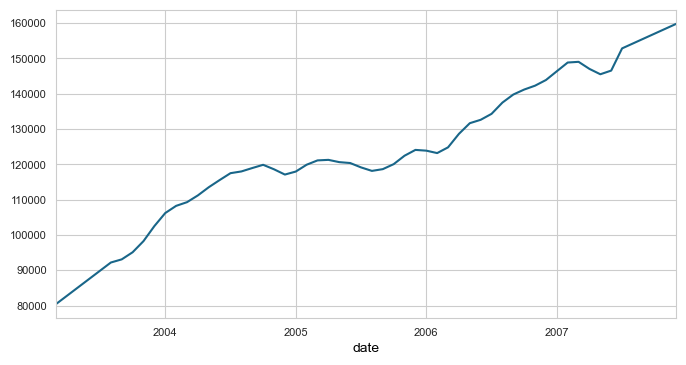

In [69]:
plt.rc("figure", figsize=(8,4))
trend = decomposition.trend
ax = trend.plot(color=BASE_COLOR)

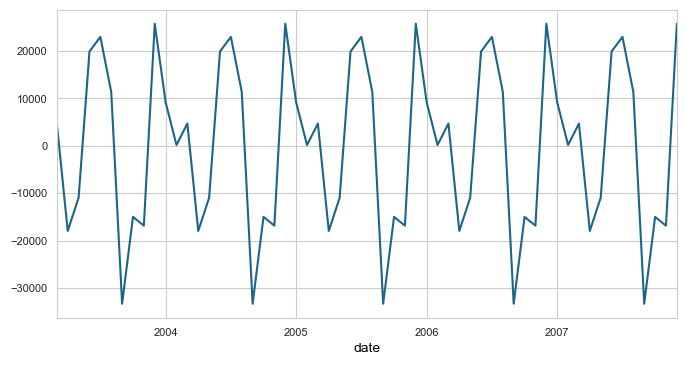

In [70]:
season = decomposition.seasonal
ax = season.plot(color=BASE_COLOR)

Using statmodels we can confirm a strong seasonal pattern during summer and christmas periods. We also see a upward trent where delays increase every year, at a higher rate that flights.

### **Delay summary:**

>When flights increase, delays increase as well, although delays grow at a higher rate.
There is definite upwards trend in flights and delays year apon year
There is a strong seasonal pattern. There are 2 strong peaks, the biggest one around xmas time in December - March, and another one during summer months June - August
Mondays, Wednesdays and Thursdays are the busiest times at airports, it is the most quiet over weekends

### Categorical analysis

In [71]:
# BASE_COLOR_DEP = sns.color_palette('Paired')[0]
# BASE_COLOR_DEP_LIGHT = sns.color_palette('Paired')[0]
# BASE_COLOR_ARR = sns.color_palette('Paired')[2]

In [72]:
total_delayed_flights = flight_delays.shape[0]
print('Total delayed flights: {}'.format(total_delayed_flights))

Total delayed flights: 7840134


Enrich delays with airport and plane descriptions

In [73]:
# add airport details like city and coordinates
flight_delays_enhanced = flight_delays.merge(airports, how='inner', right_on='iata', left_on='origin', suffixes=('_flight', '_origin'))
flight_delays_enhanced = flight_delays_enhanced.merge(airports, how='inner', right_on='iata', left_on='dest', suffixes=('_origin', '_dest'))

# add plane details like its age and manufacturer
flight_delays_enhanced = flight_delays_enhanced.merge(planes, how='inner', right_on='tailnum', left_on='tailNum', suffixes=('_flight', '_plane'))

# add carrier description
flight_delays_enhanced = flight_delays_enhanced.merge(carriers, how='inner', right_on='Code', left_on='uniqueCarrier', suffixes=('_flight', '_carrier'))
flight_delays_enhanced.head()

,year_flight,month,day,dayOfWeek,depTime,CRSDepTime,arrTime,CRSArrTime,uniqueCarrier,flightNum,tailNum,actualElapsedTime,CRSElapsedTime,airTime,arrDelay,depDelay,origin,dest,distance,taxiIn,taxiOut,cancelled,cancellationCode,diverted,carrierDelay,weatherDelay,NASDelay,securityDelay,lateAircraftDelay,date,flight_status,lane,airport_origin,city_origin,state_origin,country_origin,lat_origin,long_origin,airport_dest,city_dest,state_dest,country_dest,lat_dest,long_dest,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year_plane,Description
0,2003,1,2,4,0 days 21:08:00,0 days 19:35:00,0 days 23:12:00,0 days 21:53:00,UA,1275,N326UA,124,138,106,79,93,ORD,MSY,837,7,11,False,NaN,False,0,0,0,0,0,2003-01-02,delayed,ORD-MSY,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,New Orleans International,New Orleans,LA,USA,29.993389,-90.258028,Corporation,BOEING,09/11/2007,737-322,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1988,United Air Lines Inc.
1,2003,2,15,6,0 days 15:19:00,0 days 14:48:00,0 days 17:41:00,0 days 17:06:00,UA,463,N326UA,142,138,128,35,31,ORD,MSY,837,3,11,False,NaN,False,0,0,0,0,0,2003-02-15,delayed,ORD-MSY,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,New Orleans International,New Orleans,LA,USA,29.993389,-90.258028,Corporation,BOEING,09/11/2007,737-322,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1988,United Air Lines Inc.
2,2003,5,20,2,0 days 09:50:00,0 days 09:52:00,0 days 12:32:00,0 days 12:08:00,UA,1473,N326UA,162,136,148,24,0,ORD,MSY,837,2,12,False,NaN,False,0,0,0,0,0,2003-05-20,delayed,ORD-MSY,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,New Orleans International,New Orleans,LA,USA,29.993389,-90.258028,Corporation,BOEING,09/11/2007,737-322,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1988,United Air Lines Inc.
3,2003,10,16,4,0 days 16:28:00,0 days 14:45:00,0 days 18:30:00,0 days 16:59:00,UA,795,N326UA,122,134,110,91,103,ORD,MSY,837,2,10,False,NaN,False,91,0,0,0,0,2003-10-16,delayed,ORD-MSY,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,New Orleans International,New Orleans,LA,USA,29.993389,-90.258028,Corporation,BOEING,09/11/2007,737-322,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1988,United Air Lines Inc.
4,2004,12,6,1,0 days 09:37:00,0 days 09:25:00,0 days 12:43:00,0 days 11:42:00,UA,475,N326UA,186,137,122,61,12,ORD,MSY,837,3,61,False,NaN,False,12,0,49,0,0,2004-12-06,delayed,ORD-MSY,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,New Orleans International,New Orleans,LA,USA,29.993389,-90.258028,Corporation,BOEING,09/11/2007,737-322,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1988,United Air Lines Inc.


#### Which airports cause the most delays ?

Compare the flight distribution in departure and arrival aiports and their cities

In [74]:
def delays_by_cat(df, col, color=BASE_COLOR, theme='Origin airports', topn=20, binsize=100000):

    # calculate top category and order
    top = df[col].value_counts(ascending=False)
    top_order = top.index[:topn]    
    
    plt.figure(figsize=[10,4])
    
#     for i in np.arange(0, 2, 1):
    clrs = [BASE_COLOR if i >= 3 else BASE_HIGHLIGHT for i in np.arange(0,len(top),1)]
    
    ax = sns.countplot(data=df, y=col, palette=clrs, order=top_order, orient='h', width=0.6)
       
    plt.title('{} with the most delayed flights'.format(theme), weight='bold')
    plt.xlabel(theme)
    plt.ylabel('Number of delayed flights')

#   calculate and print % on the top of each bar
    ticks = ax.get_yticks()
    new_labels = []
    locs, labels = plt.yticks()
    for loc, label in zip(locs,labels):
        count = top[loc]
        perc = '{:0.1f}%'.format((count/top.sum())*100)
        # print only the first characters of xlabel descriptions
        text = top.index[loc][:20]
        new_labels.append(text)
        plt.text(count+(0.1*binsize), loc, perc, ha='center', va='center', color='black', fontsize=6, weight='ultralight')
    plt.yticks(ticks, new_labels, fontsize=8, weight='ultralight')
    
    # improve xticks and labels   
    ticks = np.arange(0, top[0]+binsize, binsize)
    xlabels = ['{:1.0f}'.format(tick/1000)+'K' for tick in ticks]
    plt.xticks(ticks, xlabels)  

    plt.tight_layout()
    plt.show()

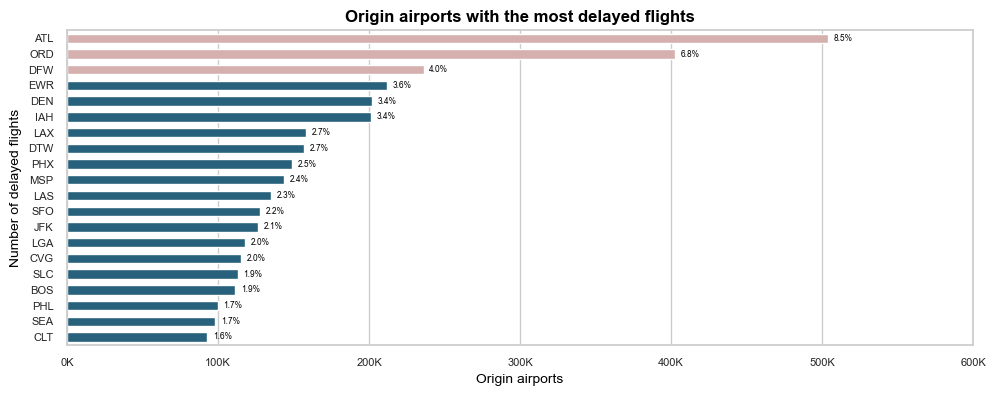

In [179]:
delays_by_cat(df=flight_delays_enhanced, col='origin', theme='Origin airports', color=BASE_COLOR_DEP)

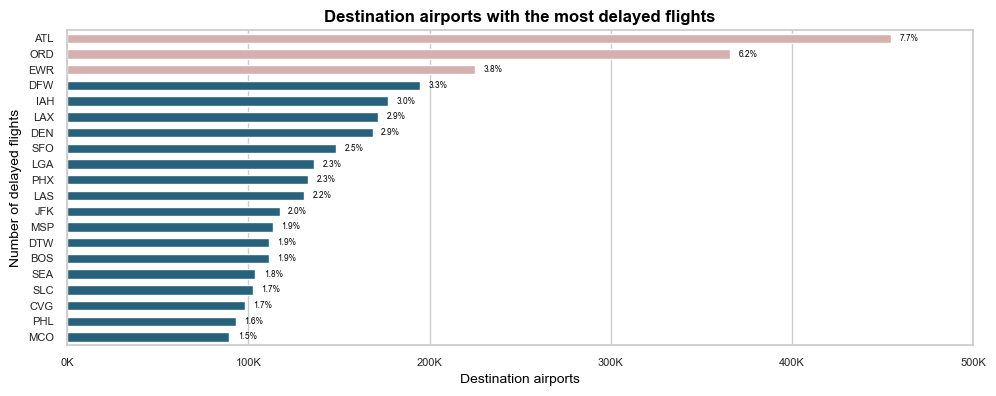

In [180]:
delays_by_cat(df=flight_delays_enhanced, col='dest', theme='Destination airports', color=BASE_COLOR_ARR)

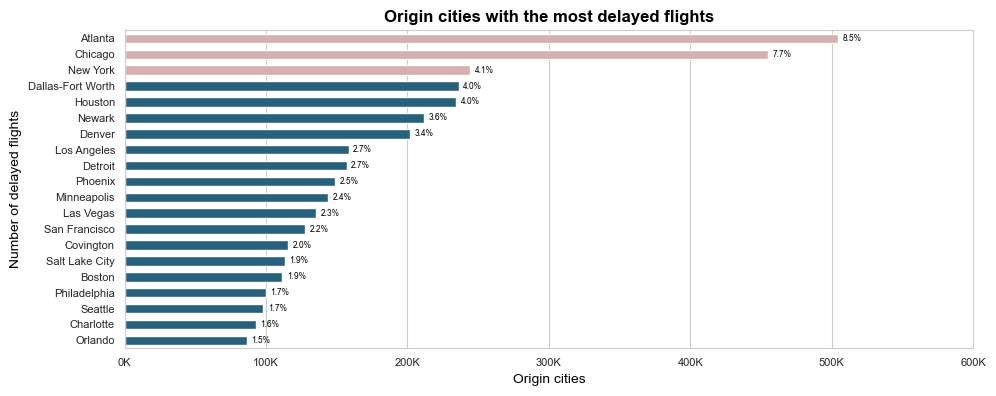

In [77]:
delays_by_cat(df=flight_delays_enhanced, col='city_origin', theme='Origin cities', color=BASE_COLOR_DEP)

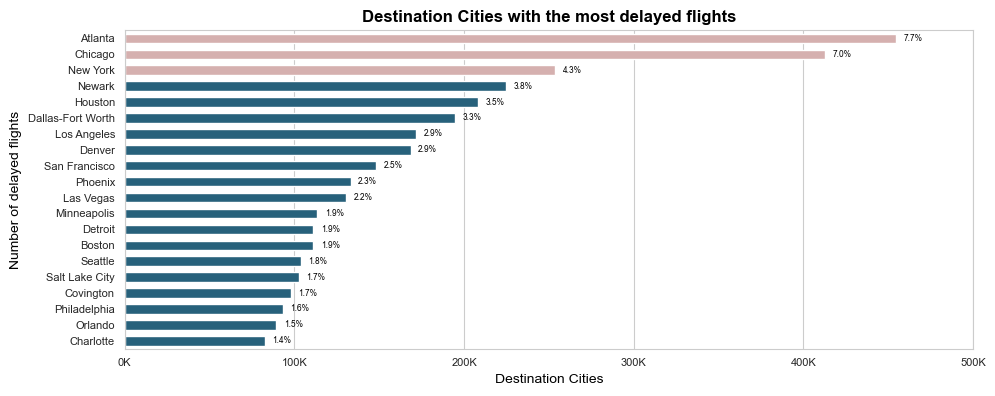

In [78]:
delays_by_cat(df=flight_delays_enhanced, col='city_dest', theme='Destination Cities', color=BASE_COLOR_ARR)

>The top origin airports (ATL, ORD, DFW) are also the top destination airports causing delays, meaning a delay in the origin is causing a delay in the destination.
Cities Atlanta, Chicago and New York have the most delays

#### Which carriers cause the most delays ?

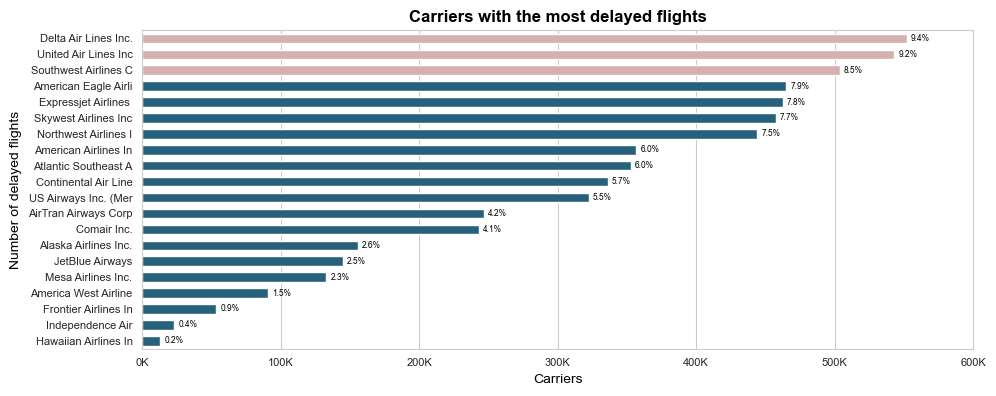

In [79]:
delays_by_cat(df=flight_delays_enhanced, col='Description', theme='Carriers', color=BASE_COLOR, binsize=100000)

#### Which lanes cause the most delays ?

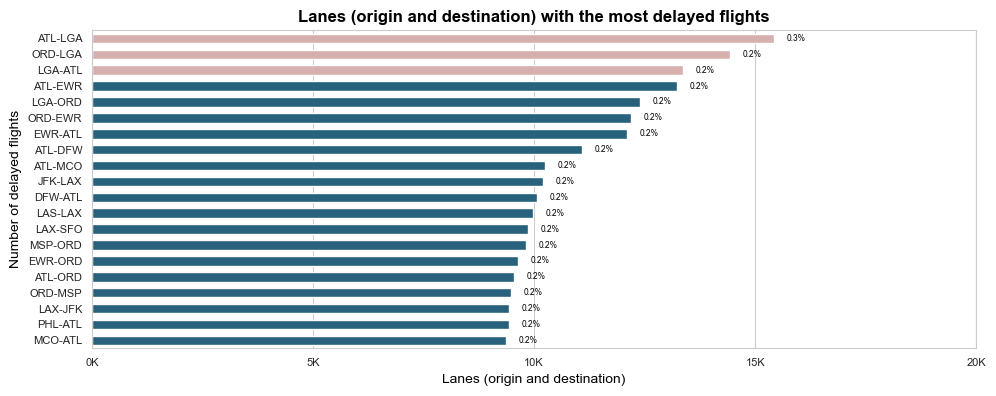

In [80]:
delays_by_cat(df=flight_delays_enhanced, col='lane', theme='Lanes (origin and destination)', color=BASE_COLOR, binsize=5000)

>When looking at lane level, the delays seems to be fairly equally distributed, although the top lanes have always one of the big cities as origin or destination

#### Which plane characteristics causes the most delays ?

Plot plane chacteristics causing delays vs those planes that are on-time

In [81]:
# get plane characteristics
flights_enhanced = flights.loc[flights['flight_status'].isin(['delayed', 'on_time'])].copy()
flights_enhanced = flights_enhanced.merge(planes, how='inner', right_on='tailnum', left_on='tailNum')
flights_enhanced['year_y'] = flights_enhanced['year_y'].replace('None', None)
flights_enhanced['year_issue'] = flights_enhanced['issue_date'].replace('None', None)

flights_enhanced['date1'] = pd.to_datetime(flights_enhanced['year_issue'], errors='coerce', format='%Y/%m/%d')
flights_enhanced['date2'] = pd.to_datetime(flights_enhanced['year_issue'], errors='coerce', format='%m/%d/%Y')
flights_enhanced['year_issue'] = flights_enhanced['date1'].fillna(flights_enhanced['date2'])
flights_enhanced.dropna(axis=0, inplace=True, subset=['year_issue', 'year_y'])

flights_enhanced['year_issue'] = flights_enhanced['year_issue'].dt.year
flights_enhanced['year_issue'] = flights_enhanced['year_issue'].astype(int)
flights_enhanced['year_y'] = flights_enhanced['year_y'].astype(int)

delays_enhanced = flights_enhanced.loc[flights_enhanced['flight_status'] == 'delayed']
ontime_enhanced = flights_enhanced.loc[flights_enhanced['flight_status'] == 'on_time']

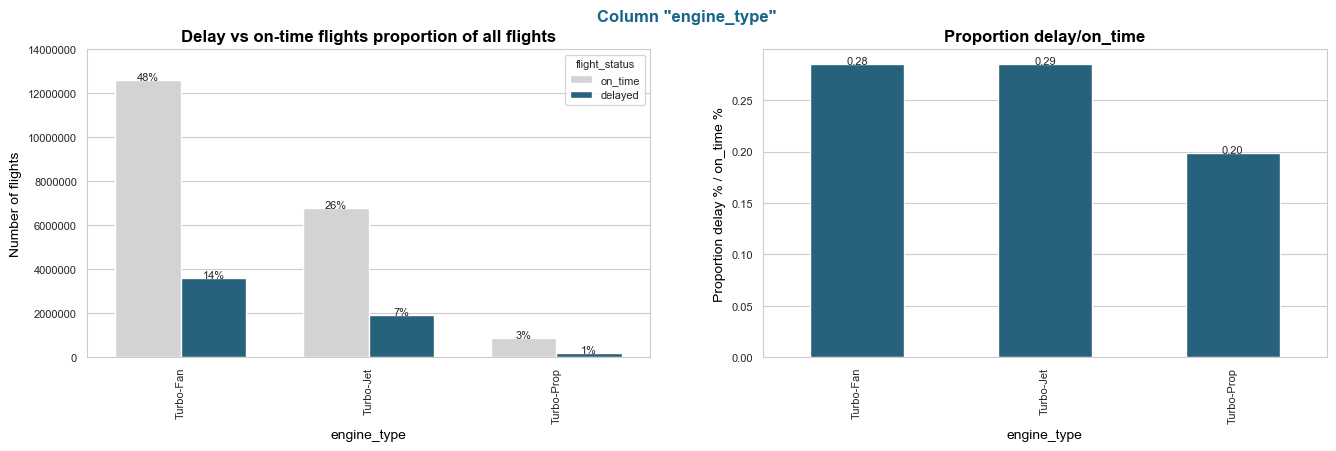

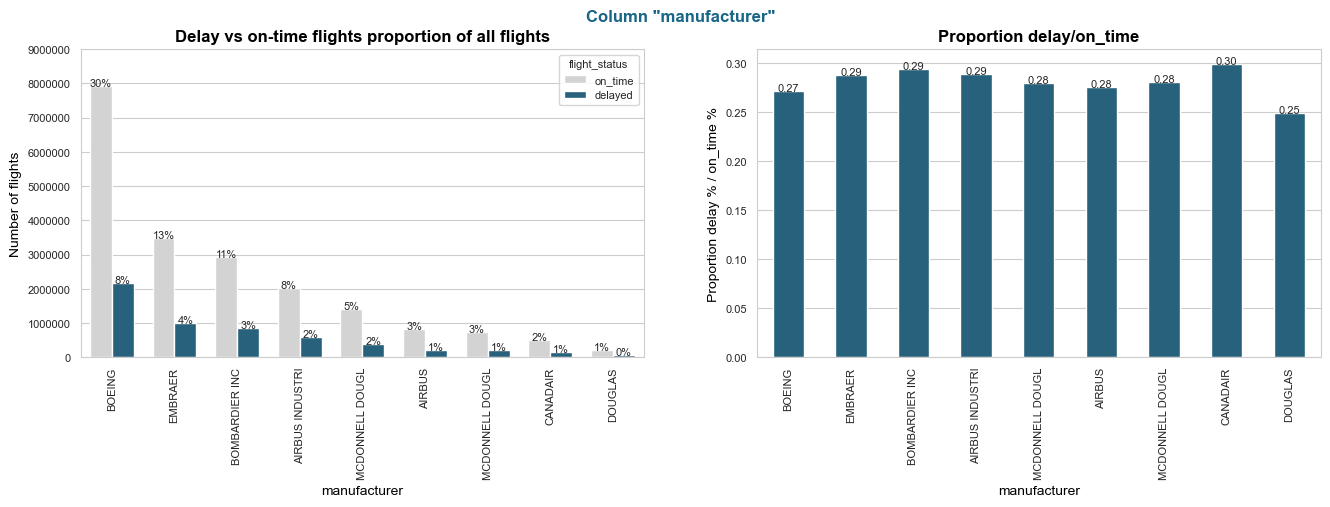

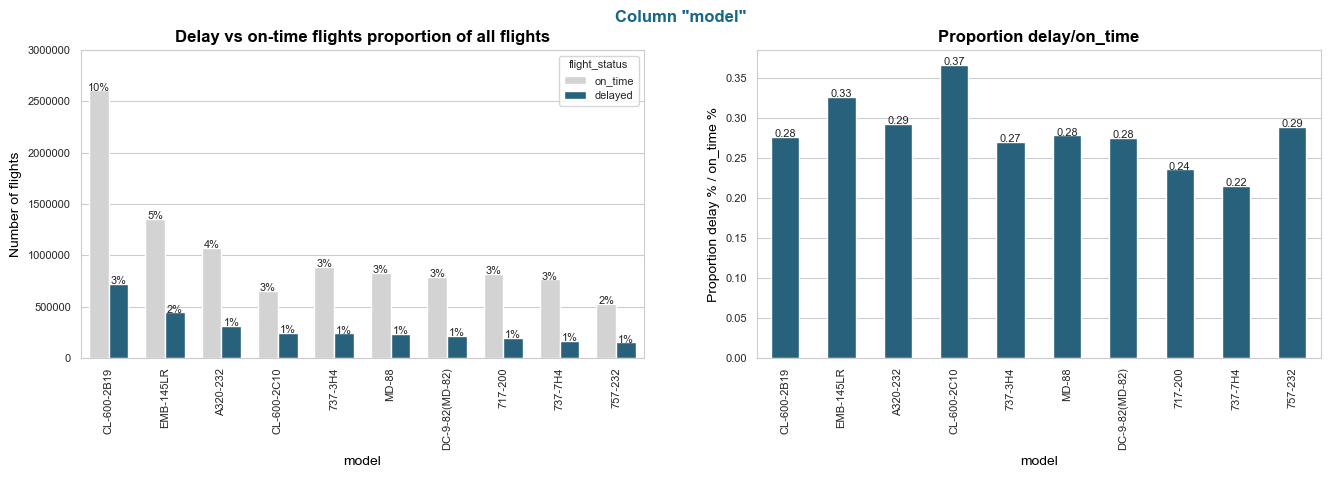

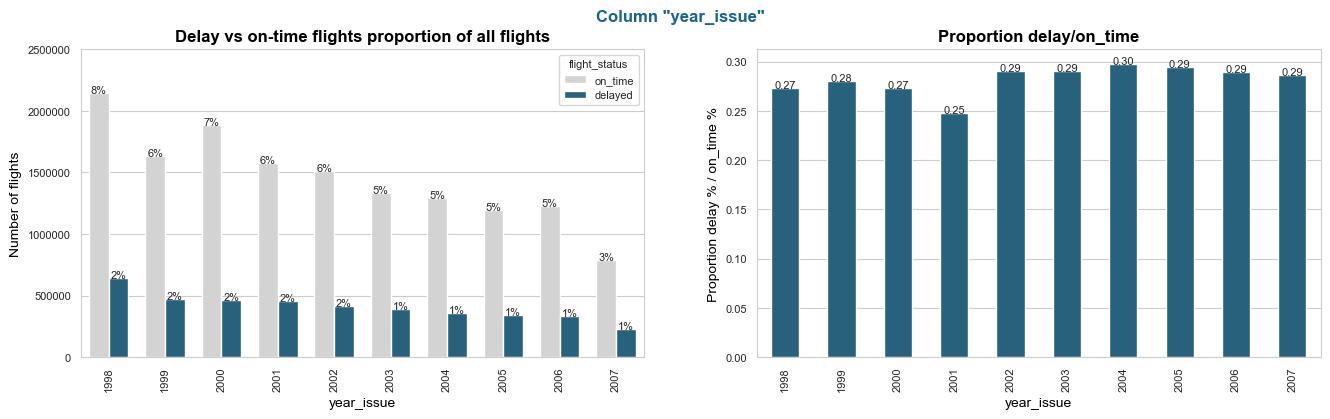

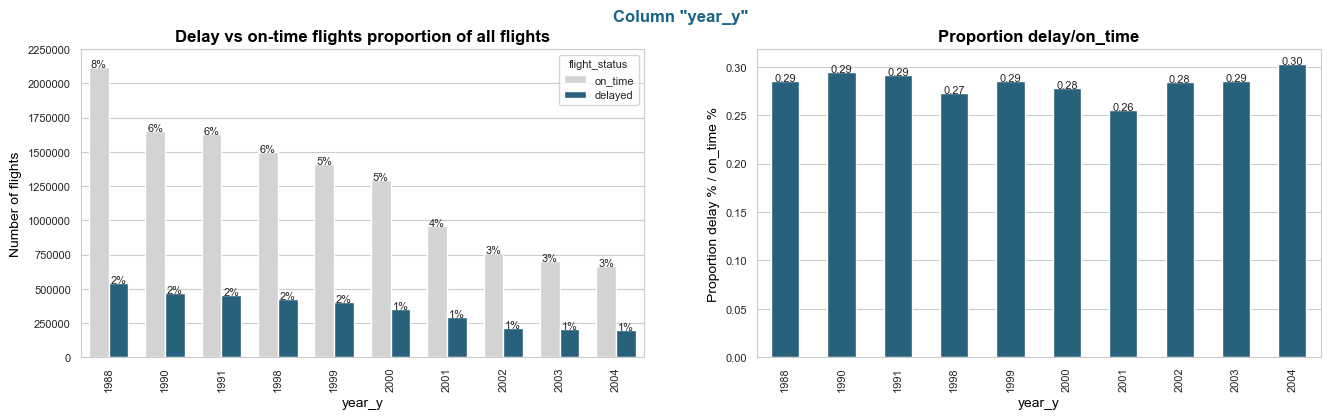

In [82]:
col = ['manufacturer', 'year_y', 'engine_type', 'model', 'year_issue']
col.sort()

grand_total = len(flights_enhanced)

for c in col:
    
    fig, ax = plt.subplots(ncols=2, figsize=(16,4))    
    
    # get top biggest delays for each column
    top_delay = delays_enhanced[c].value_counts()
    top_delay = top_delay.loc[top_delay > 50000]
    top_order = top_delay.index[:10]
    # to calculate bar % later
    top_ontime = ontime_enhanced[c].value_counts()

    plt.subplot(1,2,1)
    ax = sns.countplot(x=c, data=flights_enhanced, hue='flight_status', order=top_order, palette={'delayed': BASE_COLOR, 'on_time': BASE_GREY}, dodge=True, width=0.7)
    ax.set_title('Delay vs on-time flights proportion of all flights'.format(c))
    
    
    # print % on top of bars
    delay = []
    grand = []
    for i, p in enumerate(ax.patches):
        prop = None
        # there are 2 bars for each feature   
        if i >= len(top_order):
            index = i - len(top_order)
            val = p.get_height()/grand_total
            # calculate proportion of delay / on_time
            prop = val/grand[index]
            delay.append(prop)            
        else:
            index = i
            val = p.get_height()/grand_total
            grand.append(val)
            
        ax.annotate("{:.0%}".format(val), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 2), 
                   textcoords = 'offset points',
                   size=8, 
                   weight='ultralight')

            
    # format yticks        
    yticks = ax.get_yticks()
    ylabels = ['{:1.0f}'.format(tick) for tick in yticks]
    plt.yticks(yticks, ylabels)   
    plt.ylabel('Number of flights')
    
    # PLOT 2 - proportions
    plt.subplot(1,2,2)
#     clrs = [BASE_COLOR if i < max(delay) else BASE_HIGHLIGHT for i in delay]
    ax2 = sns.barplot(x=top_order, y=delay, color=BASE_COLOR, width=0.5)
    ax2.set_title('Proportion delay/on_time'.format(c))
    ax2.set_ylabel('Proportion delay % / on_time %')
    
    
    # improve xticks to be max 15 characters long
    tickslabels = ax.get_xticklabels()
    new_tickslabels = []
    locs, labels = plt.xticks()
    for loc, label in zip(locs,labels):
        text = label.get_text()
        new_tickslabels.append(text[:15])
    ax.set_xticklabels(new_tickslabels, rotation=90)    
    ax2.set_xticklabels(new_tickslabels, rotation=90)    
    
    # annotate bars with proporation value
    for p in ax2.patches:
        val = p.get_height()
        ax2.annotate("{:.2f}".format(val), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 2), 
                   textcoords = 'offset points',
                   size=8, 
                   weight='ultralight')
    
    plt.xlabel(c)
    plt.suptitle('Column "{}"'.format(c), color=BASE_COLOR)
    plt.show()

When comparing categorical features using proportion of delays over on-time flights, characteristics are quite similar with a factor of around 30%. 
Only watch-out would be airplane model CL-600-2C1D which have a factor of 37%

#### Is it the oldest planes that cause delays ?

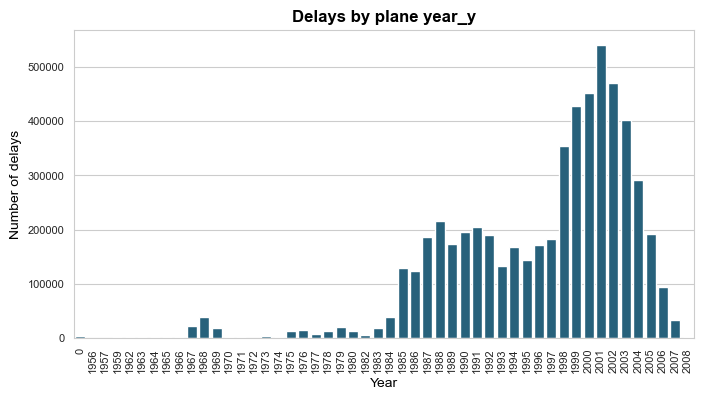

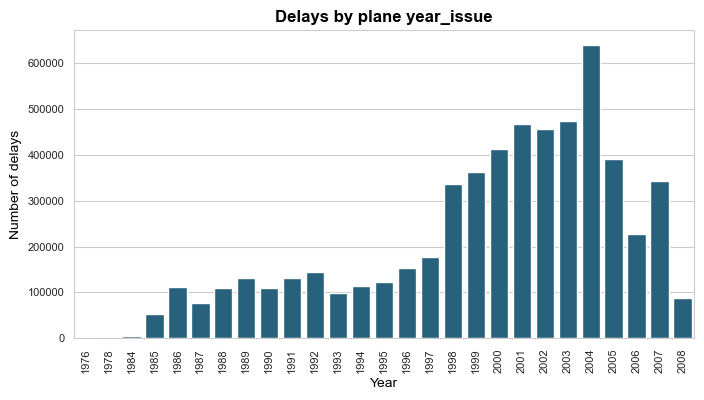

In [83]:
col = ['year_y', 'year_issue']

for c in col:

#     plt.figure(figsize=[12,6])
    top = delays_enhanced[c].value_counts().reset_index()
    top.sort_values(by='index', inplace=True)

    # highlight the year with most flight delays
#     clrs = [BASE_COLOR if i < max(top[c]) else BASE_HIGHLIGHT for i in top[c]]
            
    ax = sns.countplot(x=c, data=delays_enhanced, dodge=True, color=BASE_COLOR)
    plt.xticks(rotation=90)
    plt.ylabel('Number of delays')
    plt.xlabel('Year')
    plt.title('Delays by plane {}'.format(c))
    plt.show()

Ironically, delays occur in younger planes. Planes from year 2004 seem to cause the most delays which is quite surprising.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

<blockquote>


**Most signifant findings:**

- Around 76% of flights are on-time, where as 21% are delayed. Only 2% of flights are cancelled or diverted which is therefore not the main concern

- Both departure and arrival delays in minutes are right skewed. When plotted on a log scale, arrival delays are still right skewed whilst departure delays are more normally distributed. Arrival delays were restricted to >= 15 minutes, which was not the case for departure delays, otherwise departure delays would also be right skewed.

- Most arrivals are around 20 minutes late. There is a steep decline in delays > 20 minutes.

- The top 3 reasons for delays are caused by late aircrafts, NAS (Air traffic control), and carriers:
    - 36% of delays are caused by late aircrafts with an average of 19 minutes delay
    - 31% of delays are caused by NAS with an average of 16 minutes delay 
    - 28% of delays are caused by carriers with an average of 15 minutes delay
    - Weather and security cause only 6% of all delays

- Late aircraft, NAS and carrier delays are all right skewed, with a normal distribution on log scale. The mean delay on log scale are around 20-25 min

- When flights increase, delays increase as well, although delays grow at a higher rate. There is definite upwards trend in flights and delays year apon year. 

- There is a strong seasonal pattern. There are 2 strong peaks, the biggest one around christmas time in December - March, and another one during summer months June - August. Delays decrease in spring/autumn months

- Most delays happens on weekdays on Monday, Wednesday and Thursday when there are more slightly more flights than on other days. Airports are less busy with less delays on weekends.

- Percentage difference per month for delays have a much larger range than percentage difference for all flights. This indicates that throughout the year, roughly the same number of flights fly between locations, whereas we experience more delays in airports during peak times. 

- The top 3 airports causing the most delays, are in larger cities of Atlanta, New York and Chicago.

- The top origin airports (ATL, ORD, DFW) are also the top destination airports causing delays, meaning a delay in the origin is causing a delay in the destination.

- Carriers American Airlines, Delta Airlines and United Airlines are causing 30% of all delays

- Ironically, most delays occur in younger planes which also flies more frequently. 

- When looking at lane level, the delays seems to be fairly equally distributed, although the top lanes have always one of the big cities as origin or destination

- When comparing categorical plane features using proportion of delays over on-time flights, characteristics are quite similar with a factor of around 30%. Delays seem to be evenly distributed and are not caused by certain planes. Only watch-out would be airplane model CL-600-2C1D which have a factor of 37%

**Conclusion:**

There is not as much variation in the average total flights per month **even in the peak periods**, which suggest it's not the number of flights itself that are causing the problem. The delays happens in the peak seasons in large cities mostly during the week, which suggest the biggest driver for delays might be due to passenger throughput?

</blockquote>
    
    
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

<blockquote>
    
- 2008 does not contain data for the full year, only Jan - April is available. This year was excluded from futher analysis
- Planes from year 2004 seem to cause the most delays which is quite surprising.
- I introduced new features like:
    - flight status to make analytics of cancelled, diverted, delayed and ontime flights easier
    - a date field, to make time series analyses possible to pick-up seasonal trends
- I've split delayed vs ontime flights, to make proportional comparisions easier.

</blockquote>

We continue our investigation focussing on delayed flights only

## Bivariate Exploration

<blockquote>
Around 21% of flights are delayed, whereas only 2% of flights are cancelled or diverted which is not therefore not the main concern. Let's continue our investigation, focusing on delays only.

Using the dataset that contains *delays* only, investigate the relationships between:
- Departure and arrival delays, having a deeper look at their relationship
- Numerical variables
- A deeper look at top carriers, cities/airports, and their relationships with each other example are the top carriers operating only in big cities ? Does these carriers cause problems overall, or are they a victim of an already busy airport ?
</blockquote>

In [213]:
# clear the garbage to free memory
gc.collect()

256313

In [214]:
numeric_vars = ['arrDelay', 'depDelay', 'airTime', 'distance', 'taxiIn', 'taxiOut', 'carrierDelay', 'NASDelay', 'lateAircraftDelay']

In [217]:
# take a sample of delays to speed up performance
sample = np.random.choice(flight_delays.shape[0], 30000, replace=False)
flight_delays_sample = flight_delays.iloc[sample].copy()

# handle logscale
for col in numeric_vars:
    flight_delays_sample[col] = np.where(flight_delays_sample[col] == 0, 0.9, flight_delays_sample[col])
    
flight_delays_sample.shape

(30000, 33)

In [218]:
# take a sample of all flights to speed up performance
sample = np.random.choice(flights.shape[0], 30000, replace=False)
flight_sample = flights.iloc[sample].copy()

# handle logscale
for col in numeric_vars:
    flight_sample[col] = np.where(flight_sample[col] == 0, 0.9, flight_sample[col])
    
flight_sample.shape

(30000, 33)

#### Lets get a quick overview of relationships between numerical values of interest

In [ ]:
# correlation plot for numeric values of interest

plt.figure(figsize = [8, 5])
sns.heatmap(flight_delays_sample[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

**Observations from heatplot:**
- arrDelay and depDelay have strong positive correlation, which we already discovered during univariate exploration
- depDelay have a stronger correlation with carrierDelay and lateAircraftDelay, than arrDelay. NAS does not seem be the main reason for delay in departures
- arrDelay have a stronger correlation with NASDelay than depDelay. NAS seems to be main reason for delays in destinations
- airTime and Distance have a strong positive correlation, which make sense. The longer the flight, the longer we will be in the air.
- taxiIn and taxiOut have a positive correlation with NASDelays, which could indicate air control is causing the taxiIn and taxiOut delays

In [ ]:
# sample = np.random.choice(flight_delays.shape[0], 10000, replace=False)
# flight_delays_sample_small = flight_delays.iloc[sample].copy()

# # avoid log divide by zero errors
# flight_delays_sample_log = flight_delays_sample.copy()
# for col in numeric_vars:
#     flight_delays_sample_log[col] = np.where(flight_delays_sample_log[col] == 0, 0.9, flight_delays_sample_log[col])

sns.set(style='ticks')
g = sns.PairGrid(data = flight_delays_sample, vars=numeric_vars, corner=True, dropna=True)
g.map_diag(sns.kdeplot, color=BASE_COLOR);
g.map_offdiag(sns.regplot, fit_reg=True, y_jitter=0.1, x_jitter=0.1, truncate=True, logx=True, scatter_kws={'s':20, 'edgecolor':'white', 'lw':0.2}, line_kws={'color': 'coral', 'lw':2}, color=BASE_COLOR)
plt.show()
set_plot_defaults()

**Observations from heatplot:**

- the log relationship between arrDelay and depDelay indicate that arrival delay grows slower as departure delay increase
- there is an interesting relationship between distance and airtime indicating that as the distance increase, airtime grows at a slower rate

#### Confirm the relationship between departure delay and arrival day
To what extend does delays in departure airports cause delays in arrival airports ? Do we make up any time in the air ?

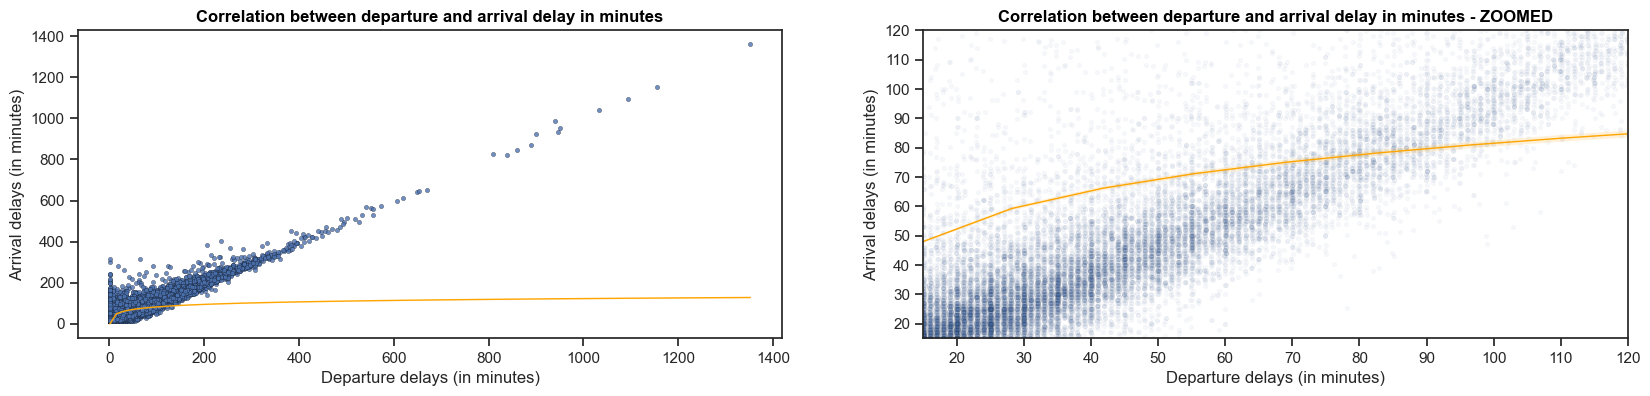

In [211]:
fig, ax = plt.subplots(ncols=2, figsize=(20,4)) 

ticks = np.arange(0, int(flight_delays_sample['arrDelay'].max()+10), 10)

plt.subplot(1,2,1)
sns.regplot(x=flight_delays_sample['depDelay'], y=flight_delays_sample['arrDelay'], logx=True, fit_reg=True, truncate=True, scatter_kws={'s':10, 'edgecolor':'black', 'lw':0.2}, line_kws={'color': 'orange', 'lw':1})
plt.xlabel('Departure delays (in minutes)')
plt.ylabel('Arrival delays (in minutes)')
plt.title('Correlation between departure and arrival delay in minutes')

plt.subplot(1,2,2)
sns.regplot(x=flight_delays_sample['depDelay'], y=flight_delays_sample['arrDelay'], fit_reg=True, logx=True, y_jitter=0.2, x_jitter=0.2, truncate=True, scatter_kws={'alpha':0.05, 's':10, 'edgecolor':'black', 'lw':0.2}, line_kws={'color': 'orange', 'lw':1})
plt.xlabel('Departure delays (in minutes)')
plt.ylabel('Arrival delays (in minutes)')
plt.title('Correlation between departure and arrival delay in minutes - ZOOMED')
plt.yticks(ticks, ticks)
plt.xticks(ticks, ticks)
plt.xlim(15,120)
plt.ylim(15,120)

plt.show()

When departure delay increase, arrival delay increase, but the longer the flight, arrival delay increases less. This means when a flight > 70 minutes long, some of the delay can be minimized

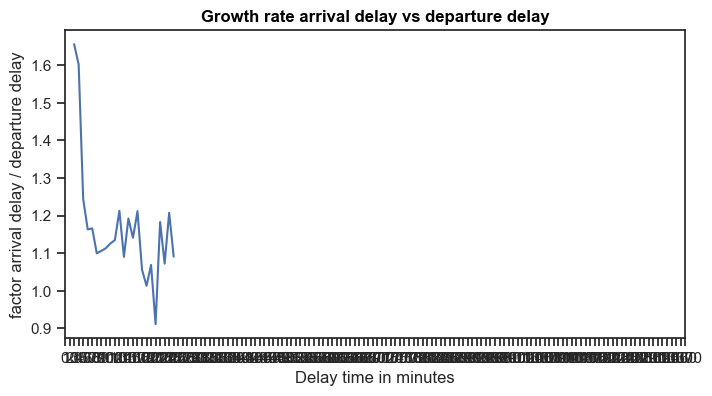

In [212]:
# build delay intervals of 10 minutes
bin_edges = np.arange(0, 250, 10)
flight_delays_sample['depDelay_bin'] = pd.cut(flight_delays_sample['depDelay'], 
                                         bins=bin_edges,
                                         include_lowest=True,
                                         labels=bin_edges[1:]).astype(float)
flight_delays_sample['arrDelay_bin'] = pd.cut(flight_delays_sample['arrDelay'], 
                                         bins=bin_edges,
                                         include_lowest=True,
                                         labels=bin_edges[1:]).astype(float)

dep_range = flight_delays_sample.depDelay_bin.value_counts()
arr_range = flight_delays_sample.arrDelay_bin.value_counts()
delay_rate = arr_range / dep_range
delay_rate.plot()
plt.xticks(ticks,ticks)
plt.xlabel('Delay time in minutes')
plt.ylabel('factor arrival delay / departure delay')
plt.title('Growth rate arrival delay vs departure delay')
plt.show()

In [215]:
test = flight_delays[['depDelay', 'arrDelay']].describe([0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99]).round(0)
test

,depDelay,arrDelay
count,7926701.0,7926701.0
mean,44.0,53.0
std,54.0,53.0
min,0.0,15.0
25%,11.0,22.0
50%,30.0,35.0
75%,59.0,64.0
85%,83.0,89.0
90%,104.0,111.0
95%,142.0,150.0


When departure time < 140 minutes, we shrink the expected arrival delay by catching up some time during the flight. We don't catch-up this delay anymore on longhaul flights from around 3 hours.

There is a slight negative correlation between arrival delays and airtime/distance. When delays <= 50 minutes, the delay factor are reduced the longer the flight time, indicating we make up for lost time midair.

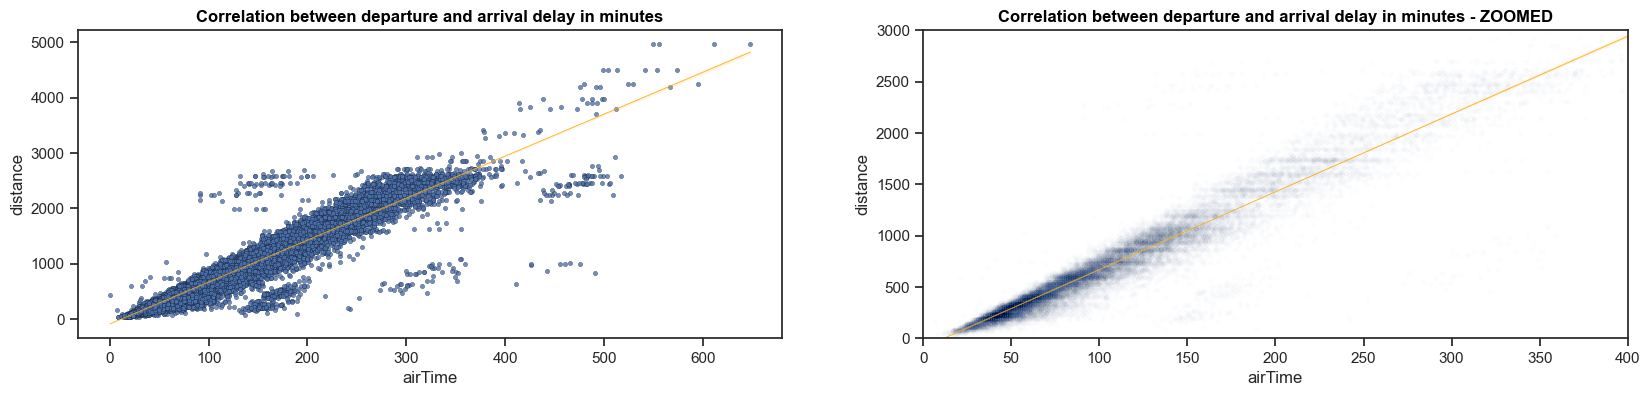

In [92]:
fig, ax = plt.subplots(ncols=2, figsize=(20,4)) 

# ticks = np.arange(0, 260, 10)

plt.subplot(1,2,1)
sns.regplot(x=flight_delays_sample['airTime'], y=flight_delays_sample['distance'], fit_reg=True, truncate=True, scatter_kws={'s':10, 'edgecolor':'black', 'lw':0.2}, line_kws={'color': 'orange', 'lw':0.5})
# plt.xlabel('Departure delays (in minutes)')
# plt.ylabel('Arrival delays (in minutes)')
plt.title('Correlation between departure and arrival delay in minutes')
# plt.yticks(ticks, ticks)
# plt.xticks(ticks, ticks)

plt.subplot(1,2,2)
sns.regplot(x=flight_delays_sample['airTime'], y=flight_delays_sample['distance'], fit_reg=True, y_jitter=0.2, x_jitter=0.2, truncate=True, scatter_kws={'alpha':0.01, 's':10, 'edgecolor':'black', 'lw':0.2}, line_kws={'color': 'orange', 'lw':0.5})
# plt.xlabel('Departure delays (in minutes)')
# plt.ylabel('Arrival delays (in minutes)')
plt.title('Correlation between departure and arrival delay in minutes - ZOOMED')
# plt.yticks(ticks, ticks)
# plt.xticks(ticks, ticks)
plt.xlim(0,400)
plt.ylim(0,3000)

plt.show()

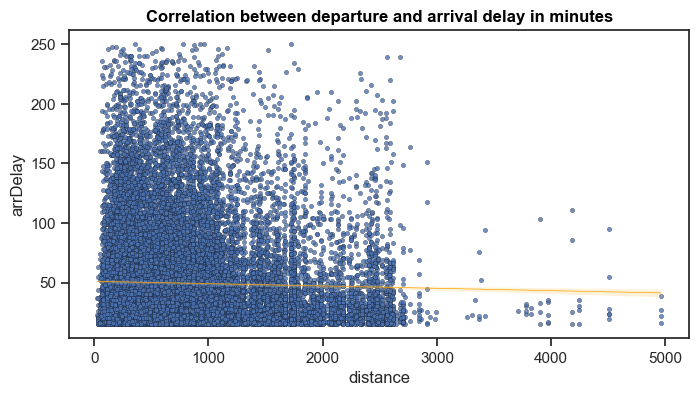

In [93]:
# fig, ax = plt.subplots(ncols=2, figsize=(20,4)) 

xticks = np.arange(0, 260, 10)
yticks = np.arange(0, 5500, 500)

# plt.subplot(1,2,1)
sns.regplot(y=flight_delays_sample['arrDelay'], x=flight_delays_sample['distance'], fit_reg=True, truncate=True, scatter_kws={'s':10, 'edgecolor':'black', 'lw':0.2}, line_kws={'color': 'orange', 'lw':0.5})
# plt.xlabel('Departure delays (in minutes)')
# plt.ylabel('Arrival delays (in minutes)')
plt.title('Correlation between departure and arrival delay in minutes')
# plt.xticks(yticks, yticks)
# plt.yticks(xticks, xticks)
# plt.ylim(0,3000)

# plt.subplot(1,2,2)
# sns.regplot(x=flight_delays_sample['airTime'], y=flight_delays_sample['distance'], fit_reg=True, y_jitter=0.2, x_jitter=0.2, truncate=True, scatter_kws={'alpha':0.01, 's':10, 'edgecolor':'black', 'lw':0.2}, line_kws={'color': 'orange', 'lw':0.5})
# # plt.xlabel('Departure delays (in minutes)')
# # plt.ylabel('Arrival delays (in minutes)')
# plt.title('Correlation between departure and arrival delay in minutes - ZOOMED')
# # plt.yticks(ticks, ticks)
# # plt.xticks(ticks, ticks)
# plt.xlim(0,400)
# plt.ylim(0,3000)

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



## References
- [white text in pie chart](https://www.tutorialspoint.com/how-to-change-autopct-text-color-to-be-white-in-a-pie-chart-in-matplotlib)
- [interpretting acf and pacf graphs](https://towardsdatascience.com/interpreting-acf-and-pacf-plots-for-time-series-forecasting-af0d6db4061c)
- [formating xaxis date labels](https://stackoverflow.com/questions/56638648/seaborn-barplot-and-formatting-dates-on-x-axis)
- [annotate barplot](https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/)